<a href="https://colab.research.google.com/github/KatarinaNunes/Atividade_Disciplina/blob/main/plot3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df_oflox = pd.read_excel("/Oflox_interpretado.xlsx")
df_oflox.columns


Index(['mutacao_real', 'binding_affinity', 'media_energia', 'ic50_um',
       'media_conf', 'ddG_foldx', 'classe_binding', 'classe_ic50',
       'classe_ddg', 'tendencia', 'classificacao_global'],
      dtype='object')

In [3]:
import pandas as pd

df = pd.read_excel("/Oflox_interpretado.xlsx")

df = df.rename(columns={
    "mutacao_real": "mutation",
    "binding_affinity": "binding_energy",
    "media_energia": "mean_energy",
    "ic50_um": "mean_ic50",
    "media_conf": "mean_confidence",
    "ddG_foldx": "ddG_kcal",
    "classe_binding": "binding_class",
    "classe_ic50": "ic50_class",
    "classe_ddg": "ddg_class",
    "tendencia": "trend_original",
    "classificacao_global": "global_class"
})

df.head()


mutation  binding_energy  mean_energy  mean_ic50  mean_confidence  ddG_kcal  \
0    AA91T       -5.453696          NaN     100.00         0.000000      4383   
1    AA91V       -7.025692    -6.095192       7.07         0.811250   -511577   
2   RA107L       -6.621718    -6.346369      14.00         0.864667      7276   
3    SA92A       -5.993688    -6.205018      40.40         0.879000   -522816   
4       WT       -5.251697    -6.485697     141.00         0.805000         0   

         binding_class             ic50_class                ddg_class  \
0          Muito baixa  >100 µM (muito fraco)  Desestabiliza (ΔΔG > 0)   
1  Altíssima afinidade      1–10 µM (potente)     Estabiliza (ΔΔG < 0)   
2       Alta afinidade    10–50 µM (moderado)  Desestabiliza (ΔΔG > 0)   
3                Baixa    10–50 µM (moderado)     Estabiliza (ΔΔG < 0)   
4          Muito baixa  >100 µM (muito fraco)                 Sem dado   

            trend_original       global_class  
0  Desestabiliza (ΔΔG > 0)  Dados incompletos  
1     Estabiliza (ΔΔG < 0)          Favorável  
2  Desestabiliza (ΔΔG > 0)       Desfavorável  
3     Estabiliza (ΔΔG < 0)      Intermediário  
4                  No data  Dados incompletos

In [4]:
df["trend"] = df["ddg_class"].replace({
    "Estabiliza": "Stabilizing",
    "Estabiliza (ΔΔG < -1)": "Stabilizing",
    "Estabiliza levemente (ΔΔG < 0)": "Stabilizing",

    "Desestabiliza": "Destabilizing",
    "Desestabiliza levemente (ΔΔG > 0)": "Destabilizing",
    "Desestabiliza forte (ΔΔG > 5)": "Destabilizing"
})


In [5]:
df["ddg_class"].unique()


array(['Desestabiliza (ΔΔG > 0)', 'Estabiliza (ΔΔG < 0)', 'Sem dado'],
      dtype=object)

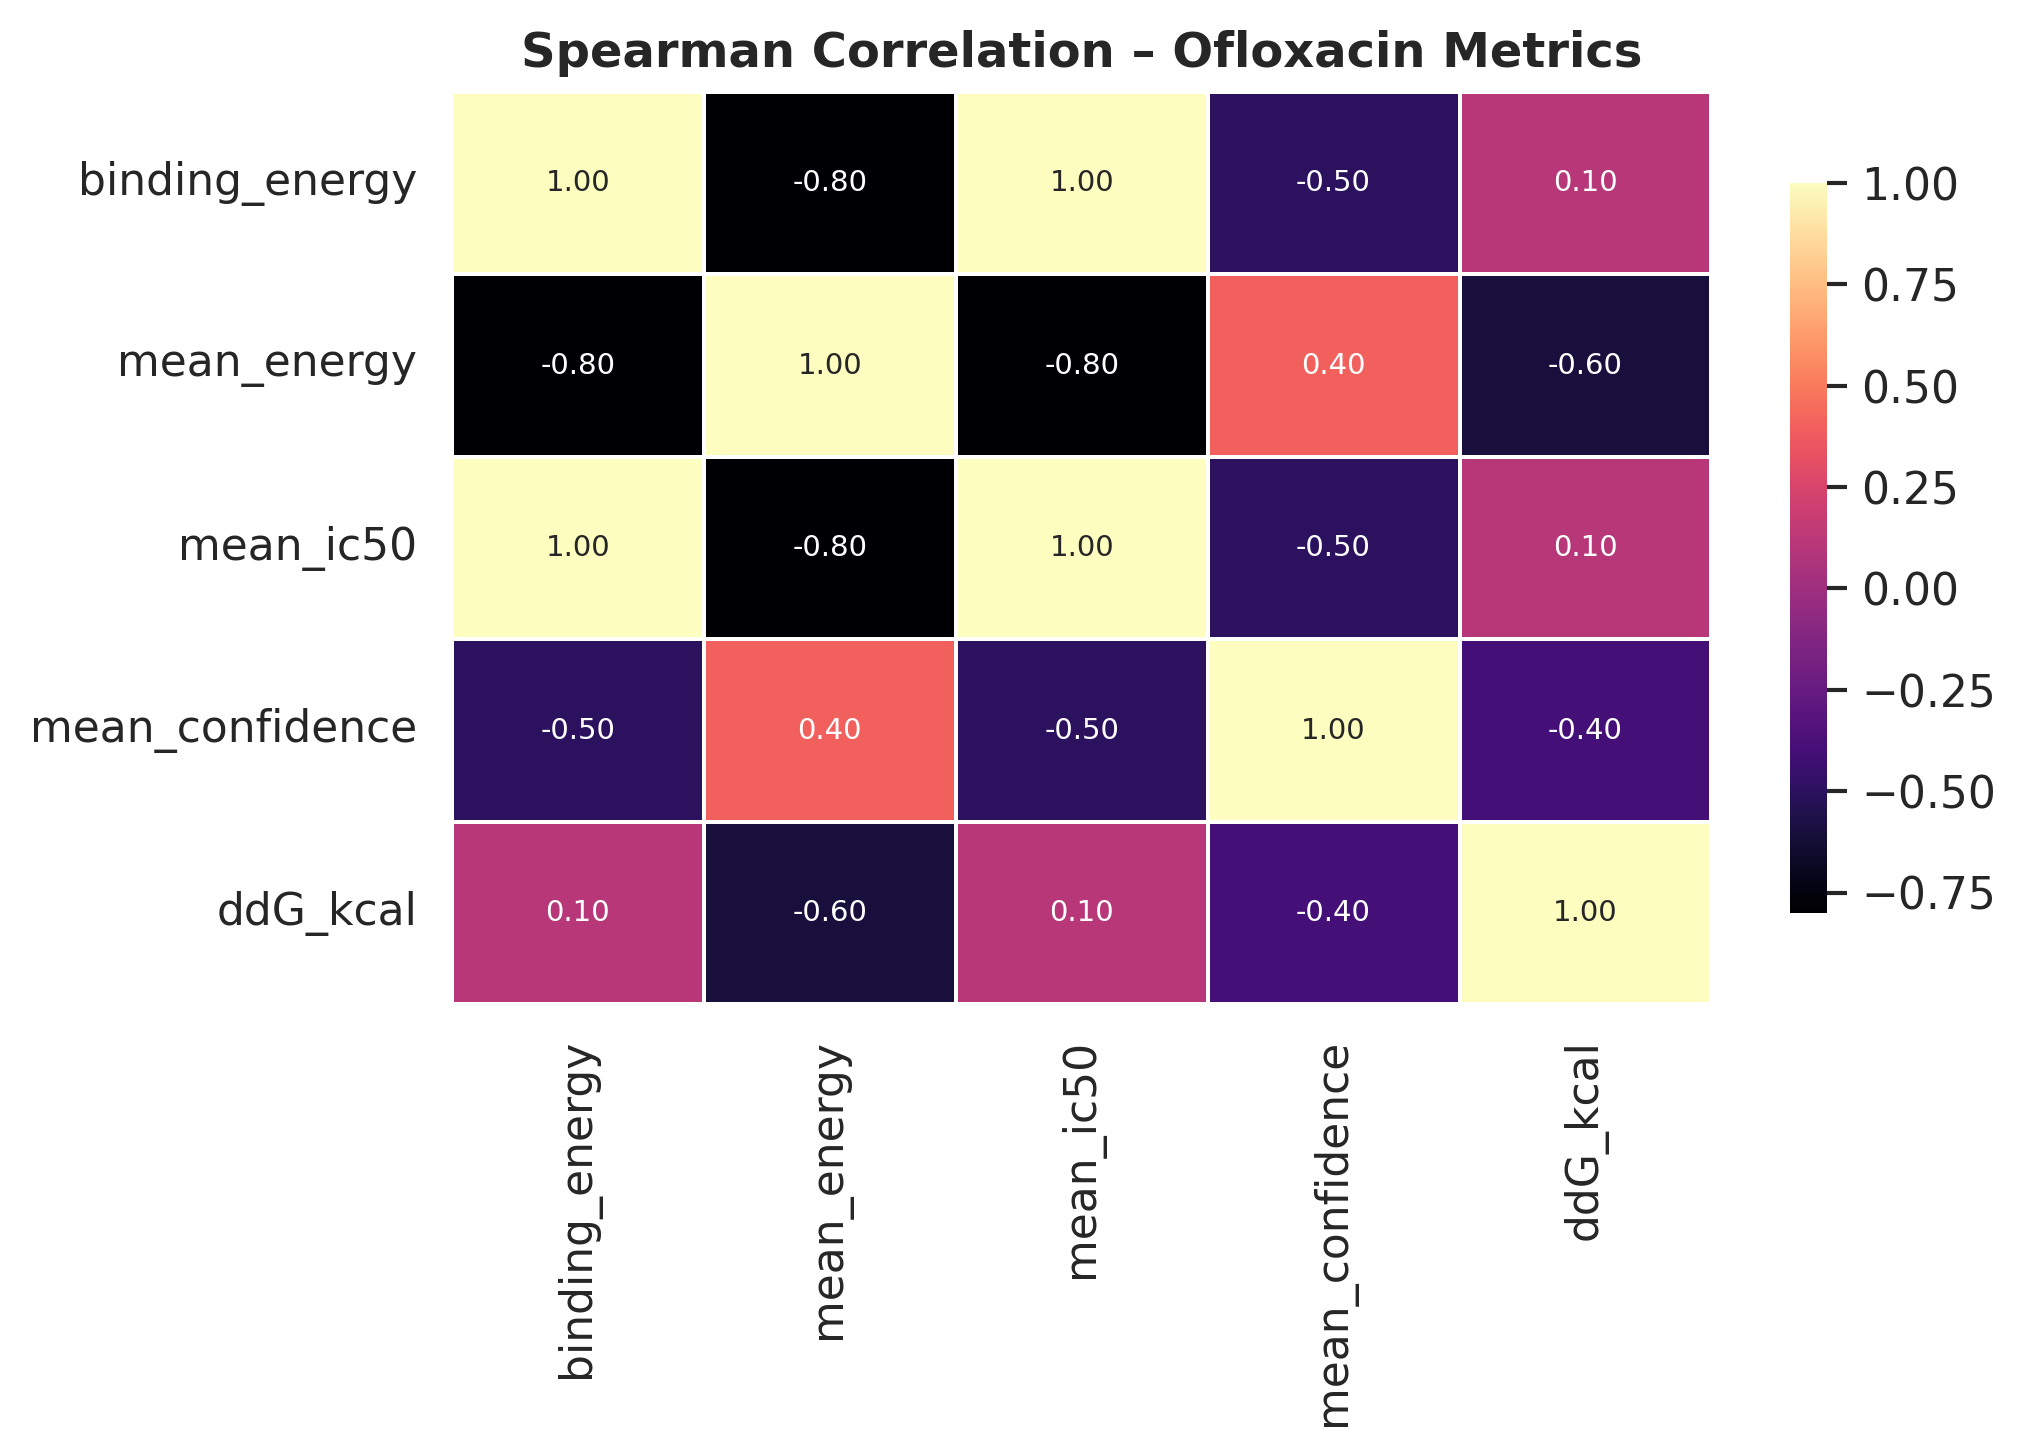

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white", context="paper", font_scale=1.2)

cols_corr = [
    "binding_energy",
    "mean_energy",
    "mean_ic50",
    "mean_confidence",
    "ddG_kcal"
]

corr = df[cols_corr].corr(method="spearman")

plt.figure(figsize=(7,5), dpi=300)

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="magma",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"shrink": 0.8},
    annot_kws={"size":7}
)

plt.title("Spearman Correlation – Ofloxacin Metrics", weight="bold")
plt.tight_layout()
plt.savefig("heatmap_oflox.png", dpi=600, bbox_inches="tight", pad_inches=0.05)
plt.show()


In [17]:
def simplify_ddg_class(x):
    if isinstance(x, str):
        x = x.strip()  # remove espaços

        if "Estabiliza" in x and "<" in x:
            return "Stabilizing"
        if "Desestabiliza" in x and ">" in x:
            return "Destabilizing"
        if "Sem" in x or "dado" in x:
            return "Unknown"
    return "Unknown"

df["trend"] = df["ddg_class"].apply(simplify_ddg_class)

print(df["trend"].unique())  # só pra conferir


['Destabilizing' 'Stabilizing' 'Unknown']


In [18]:
import seaborn as sns

palette = {
    "Stabilizing": "#4daf4a",
    "Destabilizing": "#e41a1c",
    "Unknown": "#999999"
}


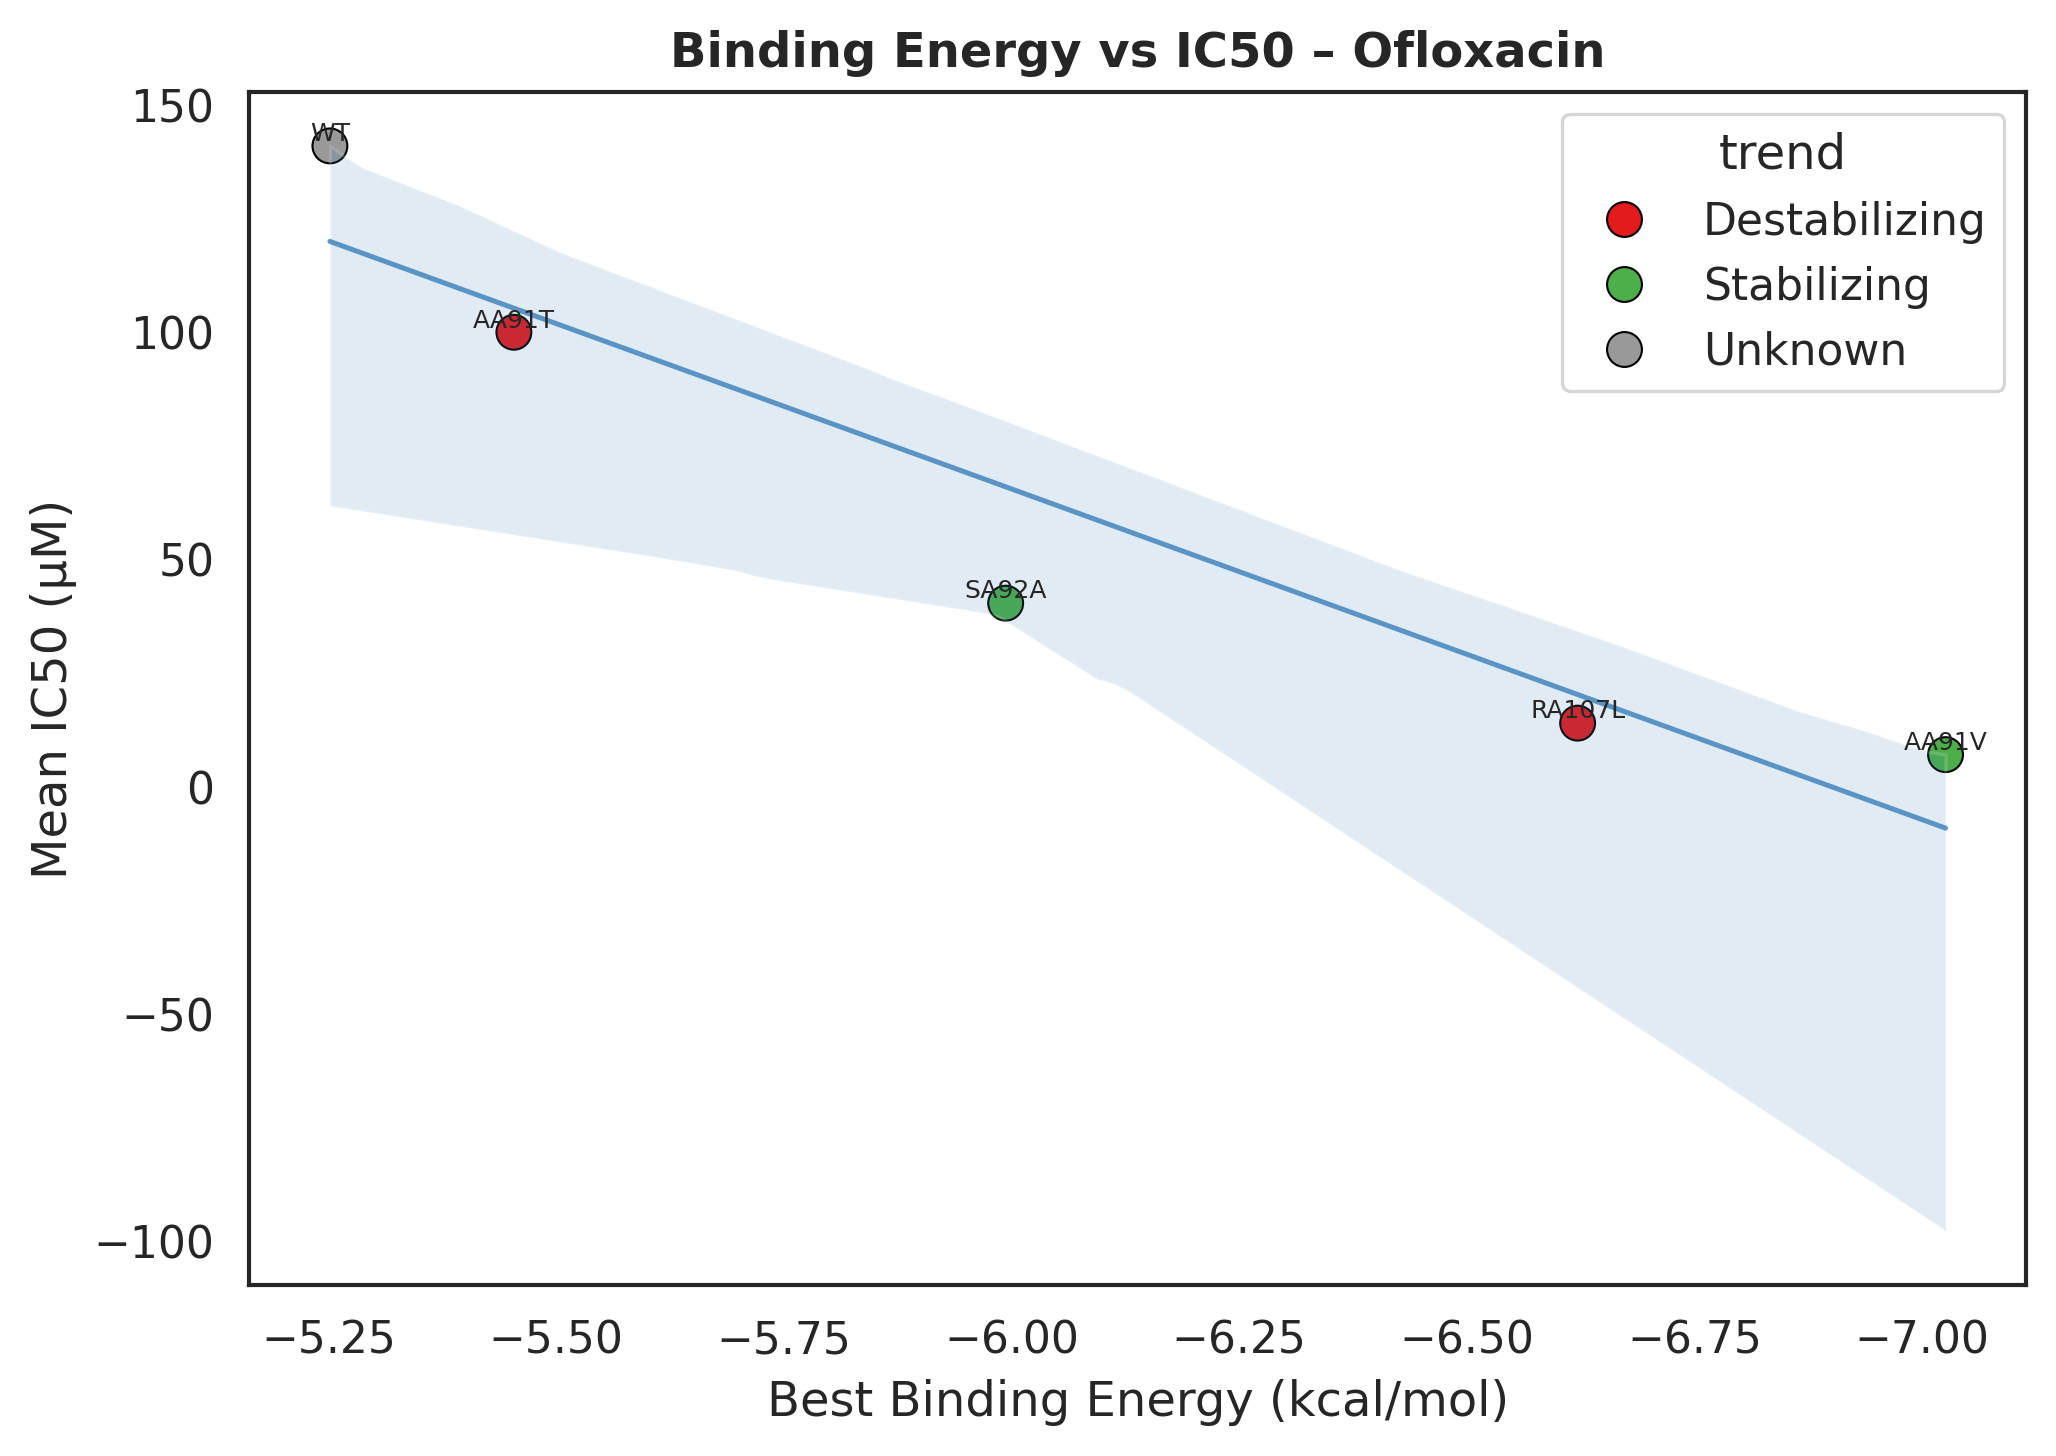

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5), dpi=300)

sns.scatterplot(
    data=df,
    x="binding_energy",
    y="mean_ic50",
    hue="trend",
    palette=palette,
    s=70,
    edgecolor="black",
    linewidth=0.5
)

sns.regplot(
    data=df,
    x="binding_energy",
    y="mean_ic50",
    scatter=False,
    color="#377eb8",
    line_kws={"linewidth":1.2, "alpha":0.8}
)

plt.gca().invert_xaxis()

for _, row in df.iterrows():
    plt.text(
        row.binding_energy,
        row.mean_ic50,
        row.mutation,
        fontsize=6,
        ha="center",
        va="bottom"
    )

plt.xlabel("Best Binding Energy (kcal/mol)")
plt.ylabel("Mean IC50 (µM)")
plt.title("Binding Energy vs IC50 – Ofloxacin", weight="bold")

plt.tight_layout()
plt.savefig("scatter_corr_oflox.png", dpi=600, bbox_inches="tight", pad_inches=0.05)
plt.show()



In [26]:
# Remover WT / Unknown
df_mut_only = df[df["trend"] != "Unknown"].copy()

# Conferir
df_mut_only["trend"].unique()


array(['Destabilizing', 'Stabilizing'], dtype=object)

In [27]:
palette = {
    "Stabilizing": "#4daf4a",
    "Destabilizing": "#e41a1c"
}


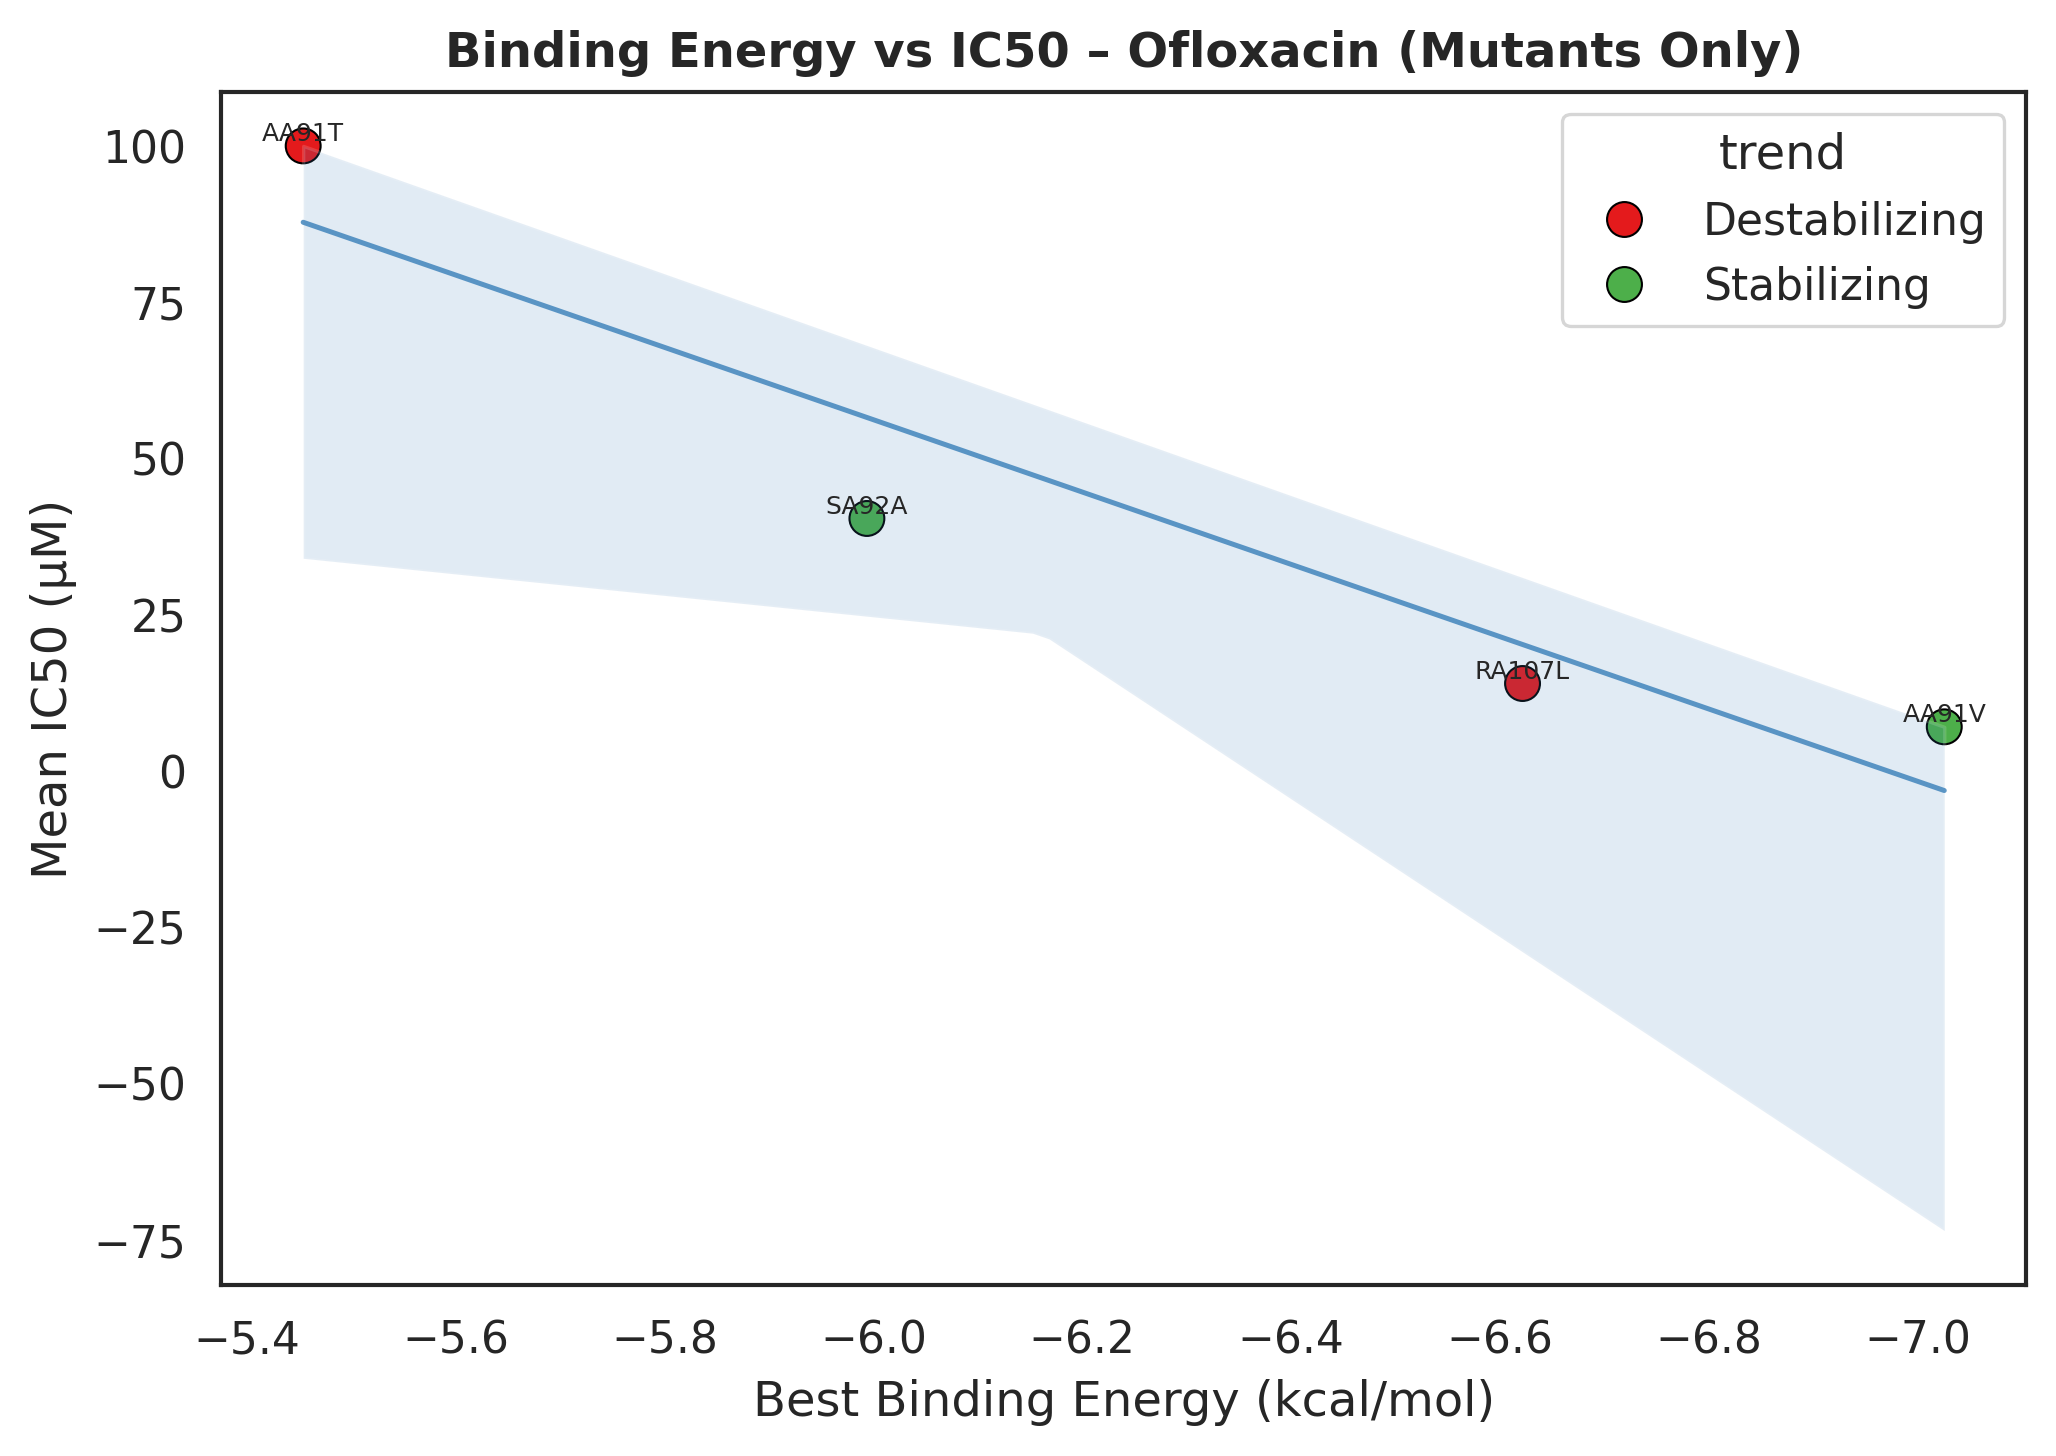

In [22]:
plt.figure(figsize=(7,5), dpi=300)

sns.scatterplot(
    data=df_mut_only,
    x="binding_energy",
    y="mean_ic50",
    hue="trend",
    palette=palette,
    s=70,
    edgecolor="black",
    linewidth=0.5
)

sns.regplot(
    data=df_mut_only,
    x="binding_energy",
    y="mean_ic50",
    scatter=False,
    color="#377eb8",
    line_kws={"linewidth": 1.2, "alpha": 0.8}
)

plt.gca().invert_xaxis()

for _, row in df_mut_only.iterrows():
    plt.text(
        row.binding_energy,
        row.mean_ic50,
        row.mutation,
        fontsize=6,
        ha="center",
        va="bottom"
    )

plt.xlabel("Best Binding Energy (kcal/mol)")
plt.ylabel("Mean IC50 (µM)")
plt.title("Binding Energy vs IC50 – Ofloxacin (Mutants Only)", weight="bold")

plt.tight_layout()
plt.savefig("scatter_corr_oflox_MUT_ONLY.png",
            dpi=600, bbox_inches="tight", pad_inches=0.05)
plt.show()


In [23]:
from google.colab import files
files.download("scatter_corr_oflox_MUT_ONLY.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PCA


In [30]:
import pandas as pd

# 1) Importar e renomear
df = pd.read_excel("/Oflox_interpretado.xlsx")

df = df.rename(columns={
    "mutacao_real": "mutation",
    "binding_affinity": "binding_energy",
    "media_energia": "mean_energy",
    "ic50_um": "mean_ic50",
    "media_conf": "mean_confidence",
    "ddG_foldx": "ddG_kcal",
    "classe_binding": "binding_class",
    "classe_ic50": "ic50_class",
    "classe_ddg": "ddg_class",
    "tendencia": "trend_original",
    "classificacao_global": "global_class"
})

# 2) Função para padronizar classe DDG
def simplify_ddg_class(x):
    if isinstance(x, str):
        x = x.strip()
        if "Estabiliza" in x:
            return "Stabilizing"
        if "Desestabiliza" in x:
            return "Destabilizing"
        if "Sem" in x or "dado" in x:
            return "Unknown"
    return "Unknown"

df["trend"] = df["ddg_class"].apply(simplify_ddg_class)

# 3) Criar df_mut somente com mutações (sem WT)
df_mut = df[df["trend"] != "Unknown"].copy()

# 4) Paleta para Mutantes
palette = {
    "Stabilizing": "#4daf4a",
    "Destabilizing": "#e41a1c"
}

# Conferir
print("Categorias:", df_mut["trend"].unique())
print("Shape df_mut:", df_mut.shape)


Categorias: ['Destabilizing' 'Stabilizing']
Shape df_mut: (4, 12)


In [31]:
cols_pca = ["binding_energy", "mean_confidence", "mean_ic50", "ddG_kcal"]

df_pca = df_mut[cols_pca].dropna().copy()
df_p = df_mut.loc[df_pca.index].copy()


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

df_p["PC1"] = X_pca[:,0]
df_p["PC2"] = X_pca[:,1]
df_p["PC3"] = X_pca[:,2]

v1, v2, v3 = [x*100 for x in pca.explained_variance_ratio_]

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)


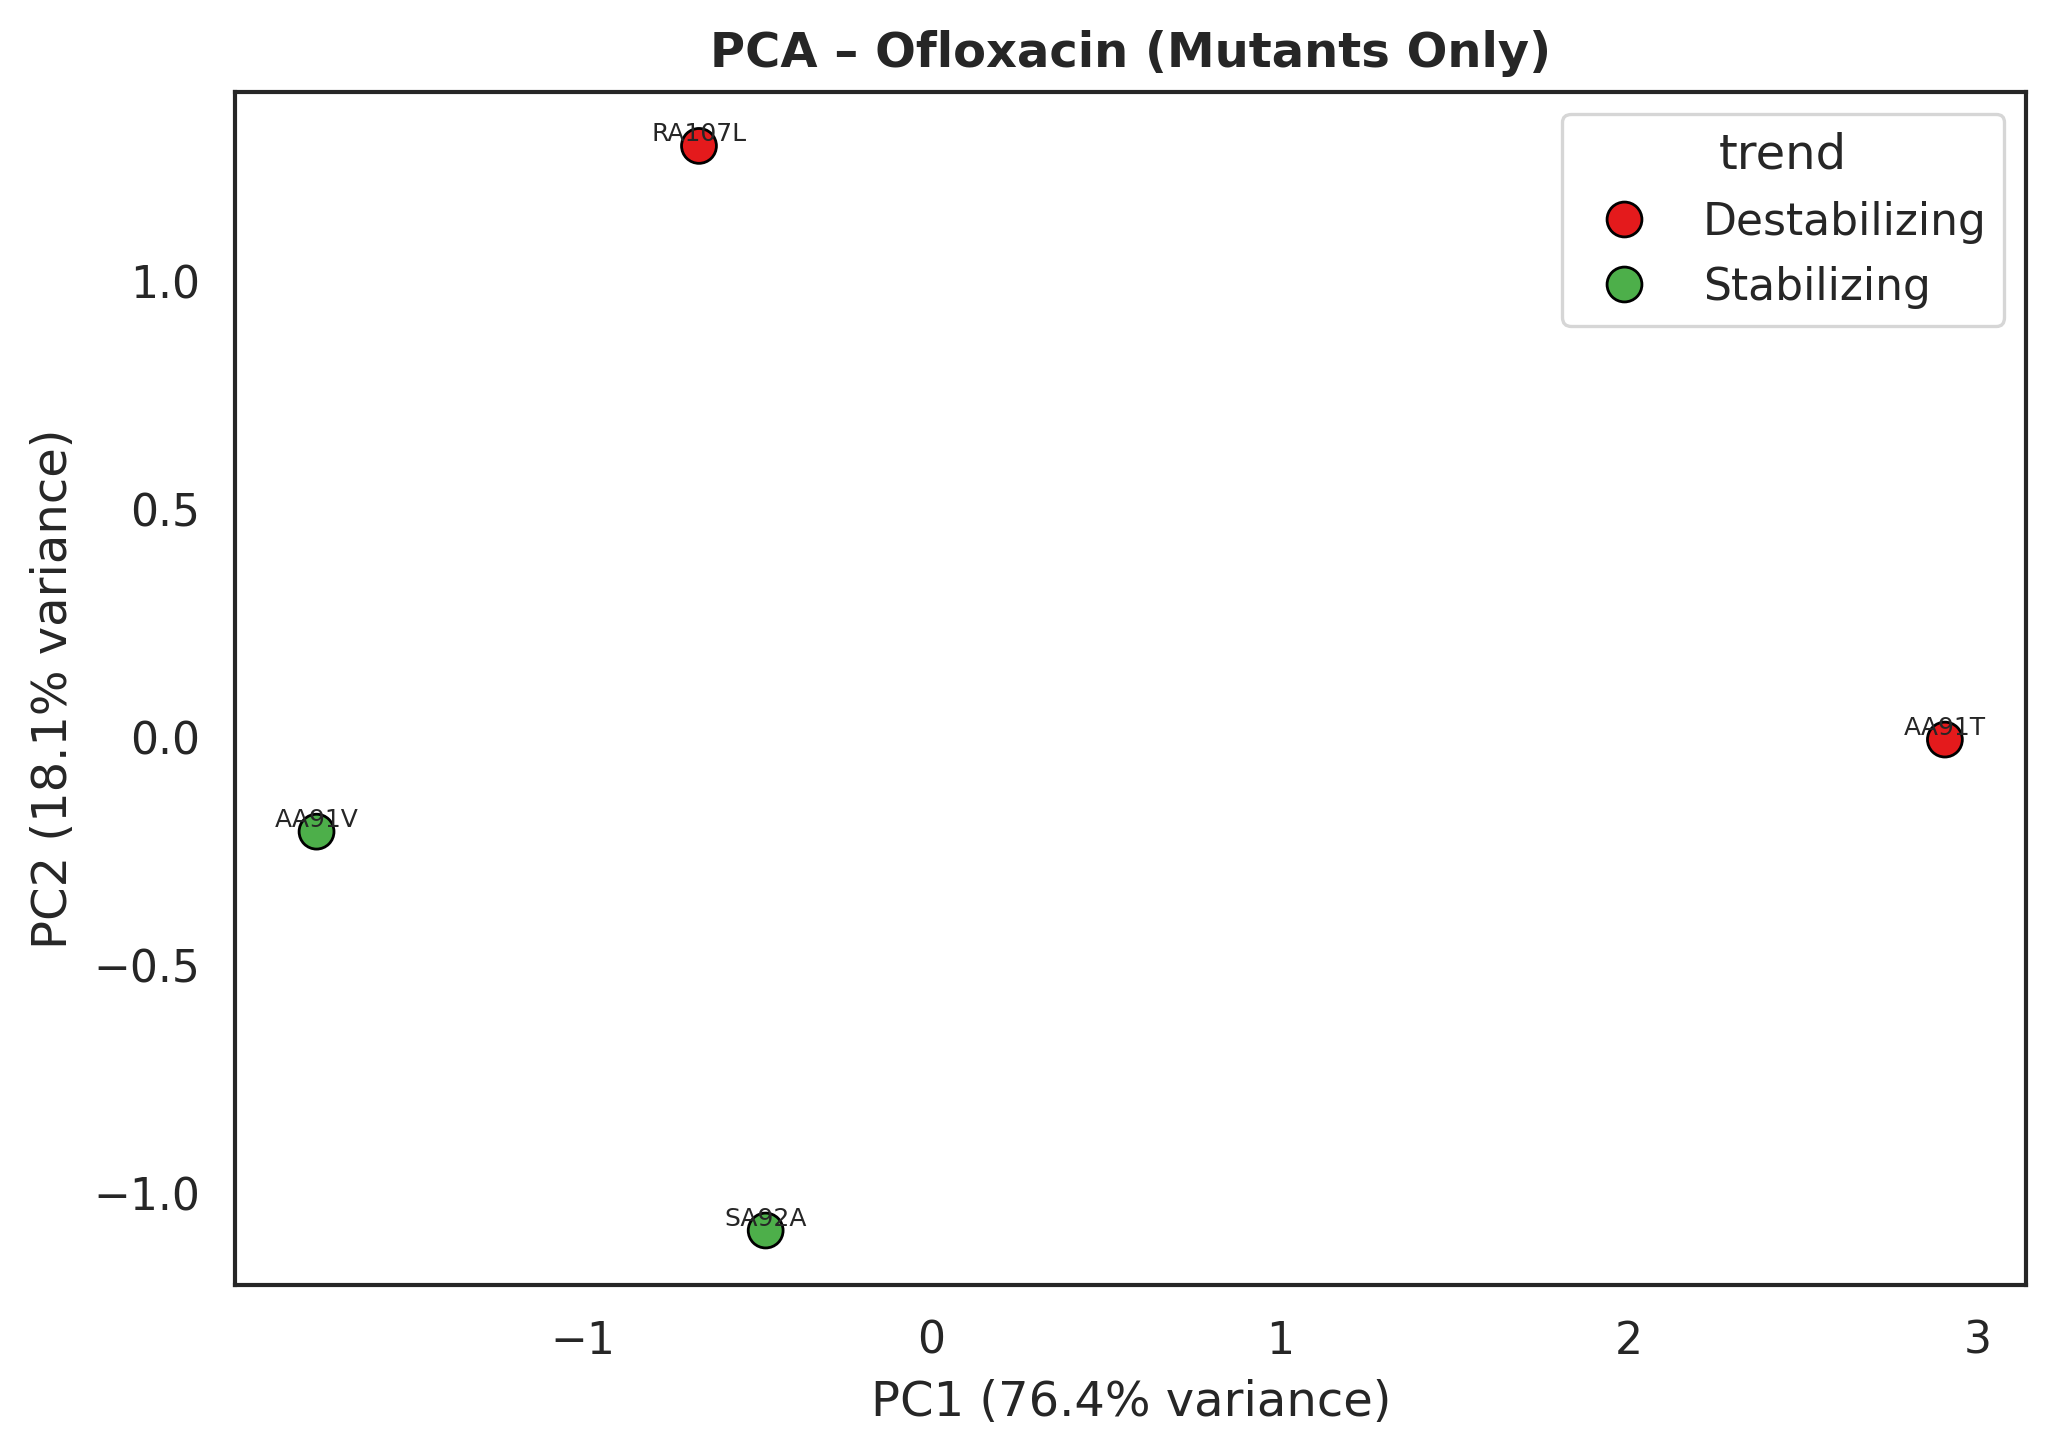

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white", context="paper", font_scale=1.2)

plt.figure(figsize=(7,5), dpi=300)

sns.scatterplot(
    data=df_p,
    x="PC1", y="PC2",
    hue="trend",
    palette=palette,
    s=70, edgecolor="black"
)

for _, row in df_p.iterrows():
    plt.text(row.PC1, row.PC2, row.mutation,
             fontsize=6, ha="center", va="bottom")

plt.xlabel(f"PC1 ({v1:.1f}% variance)")
plt.ylabel(f"PC2 ({v2:.1f}% variance)")
plt.title("PCA – Ofloxacin (Mutants Only)", weight="bold")

plt.tight_layout()
plt.savefig("PCA2D_oflox_MUT.png", dpi=600, bbox_inches="tight")
plt.show()


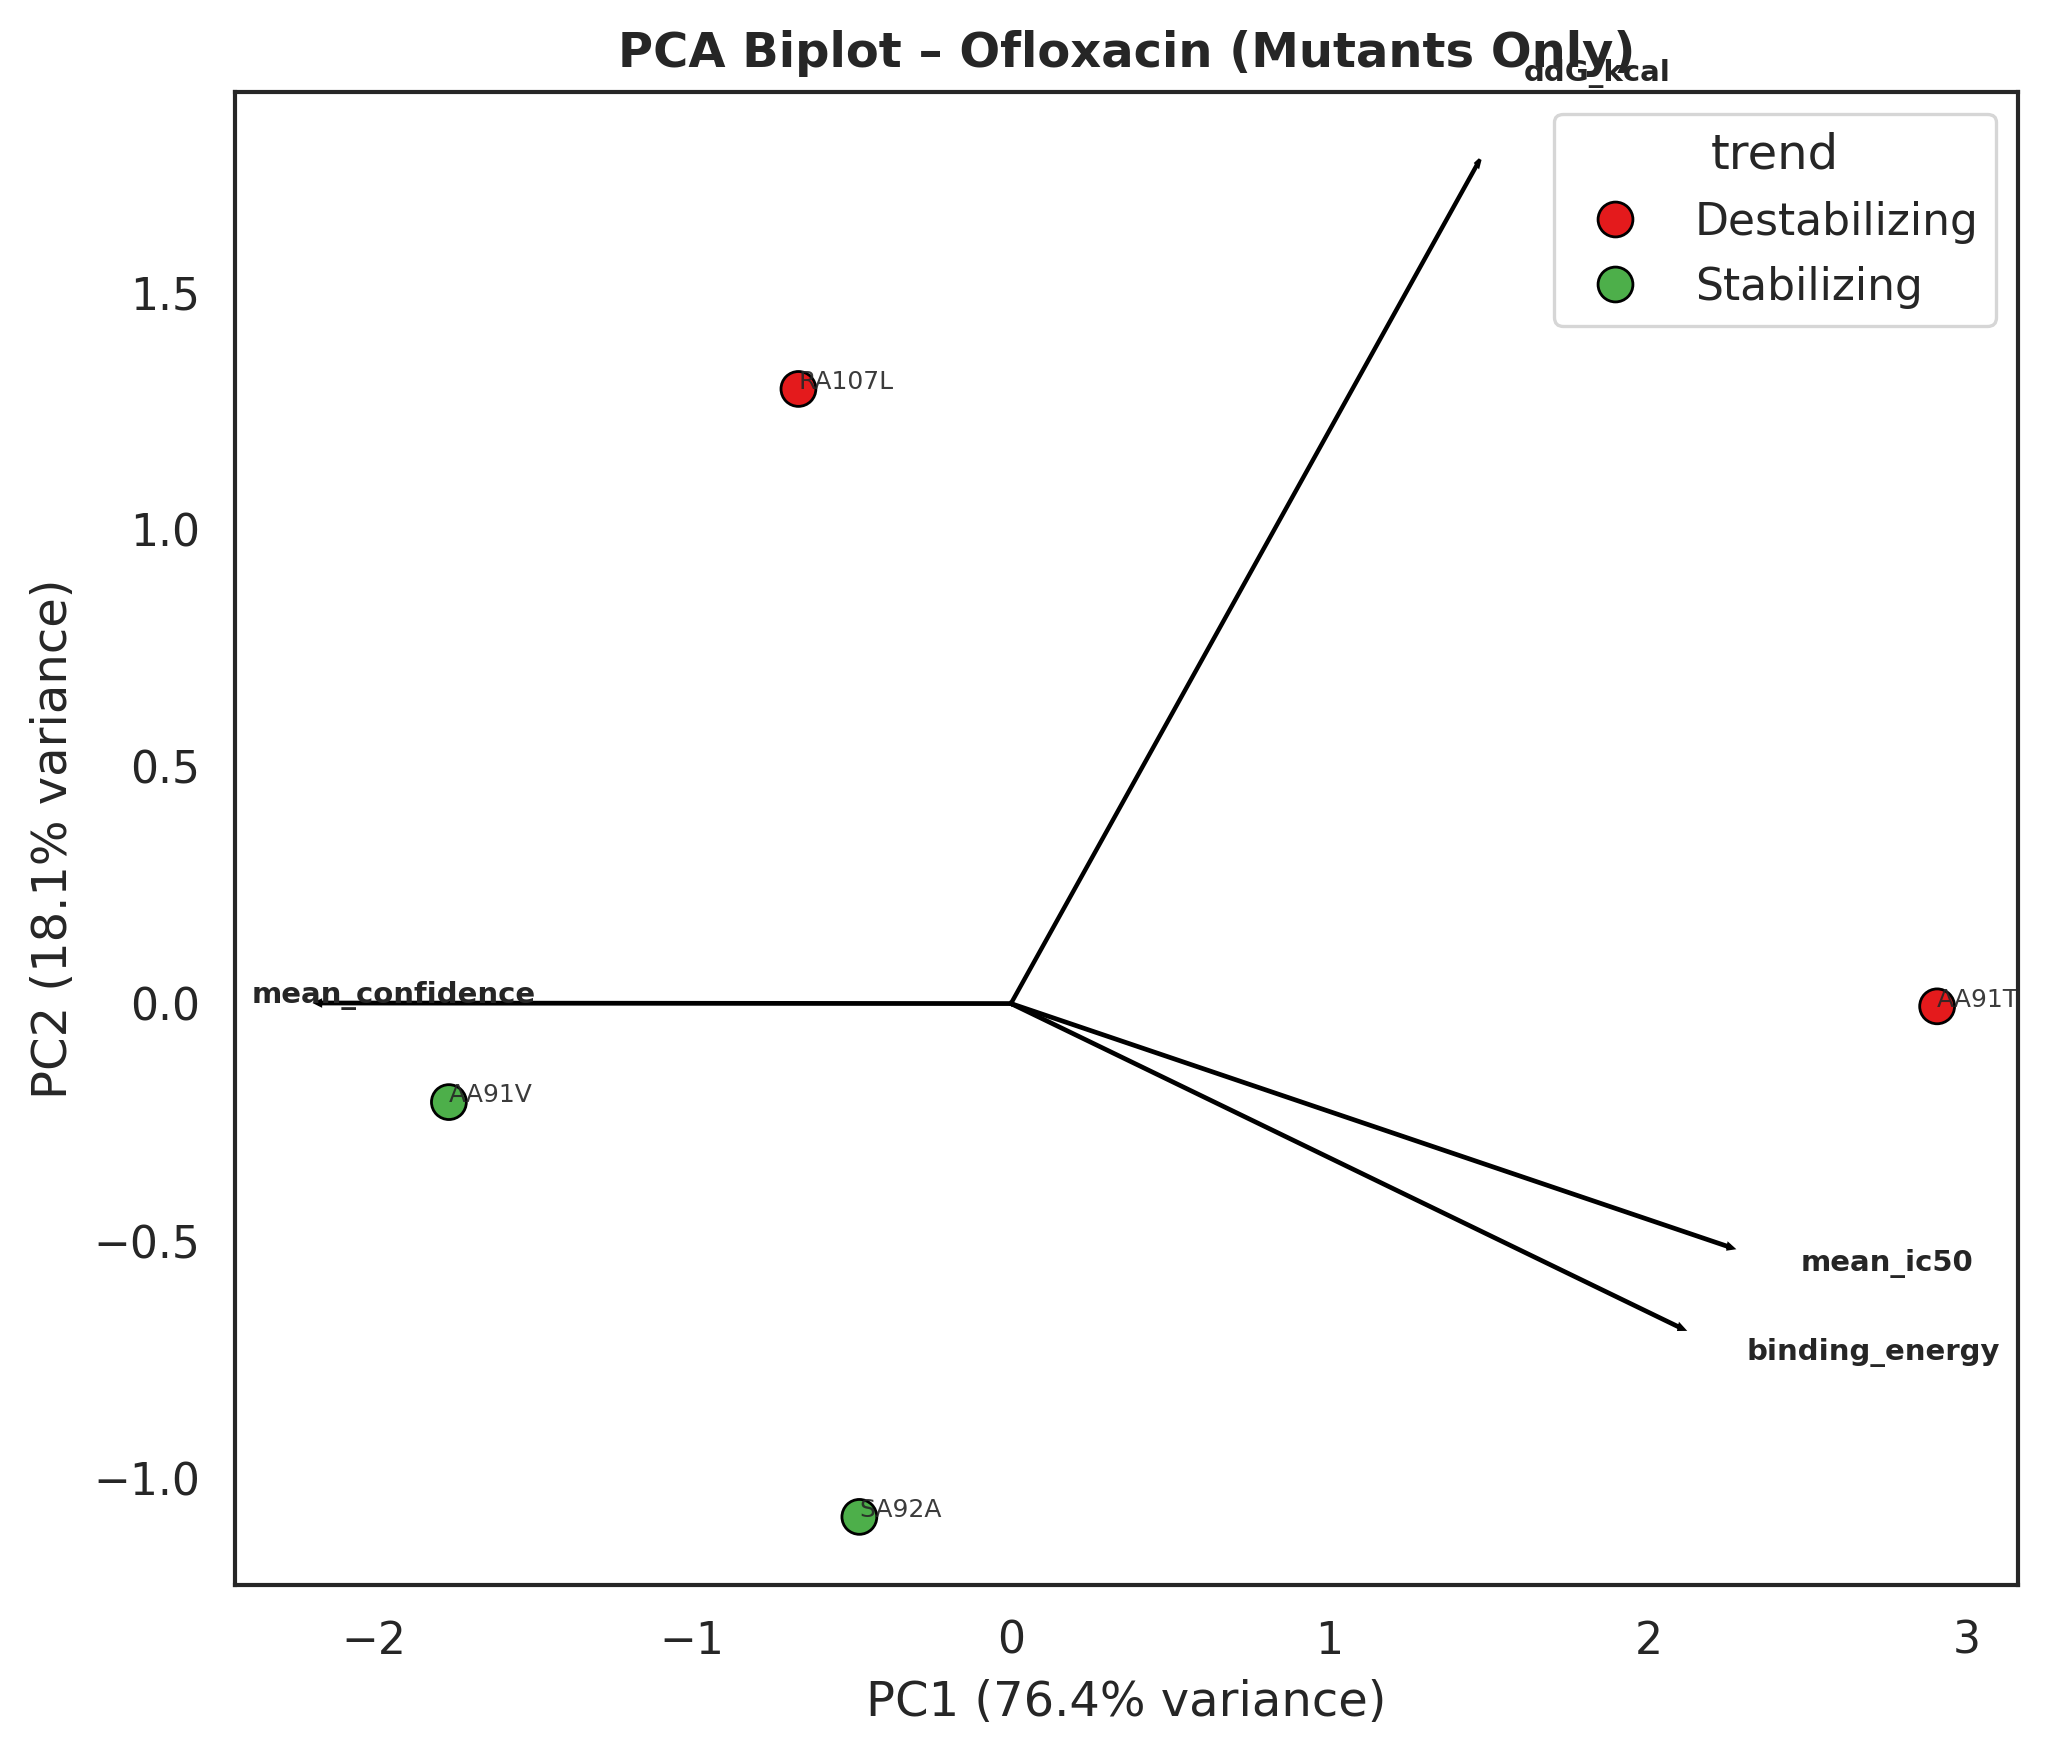

In [34]:
plt.figure(figsize=(7,6), dpi=300)

sns.scatterplot(
    data=df_p,
    x="PC1", y="PC2",
    hue="trend",
    palette=palette,
    s=70, edgecolor="black"
)

for _, row in df_p.iterrows():
    plt.text(row.PC1, row.PC2, row.mutation,
             fontsize=6, alpha=0.9)

for i, var in enumerate(cols_pca):
    plt.arrow(0, 0,
              loadings[i,0]*2,
              loadings[i,1]*2,
              color="black", width=0.003)
    plt.text(loadings[i,0]*2.2, loadings[i,1]*2.2,
             var, fontsize=7, weight="bold")

plt.xlabel(f"PC1 ({v1:.1f}% variance)")
plt.ylabel(f"PC2 ({v2:.1f}% variance)")
plt.title("PCA Biplot – Ofloxacin (Mutants Only)", weight="bold")

plt.tight_layout()
plt.savefig("PCA_biplot_oflox_MUT.png", dpi=600, bbox_inches="tight")
plt.show()


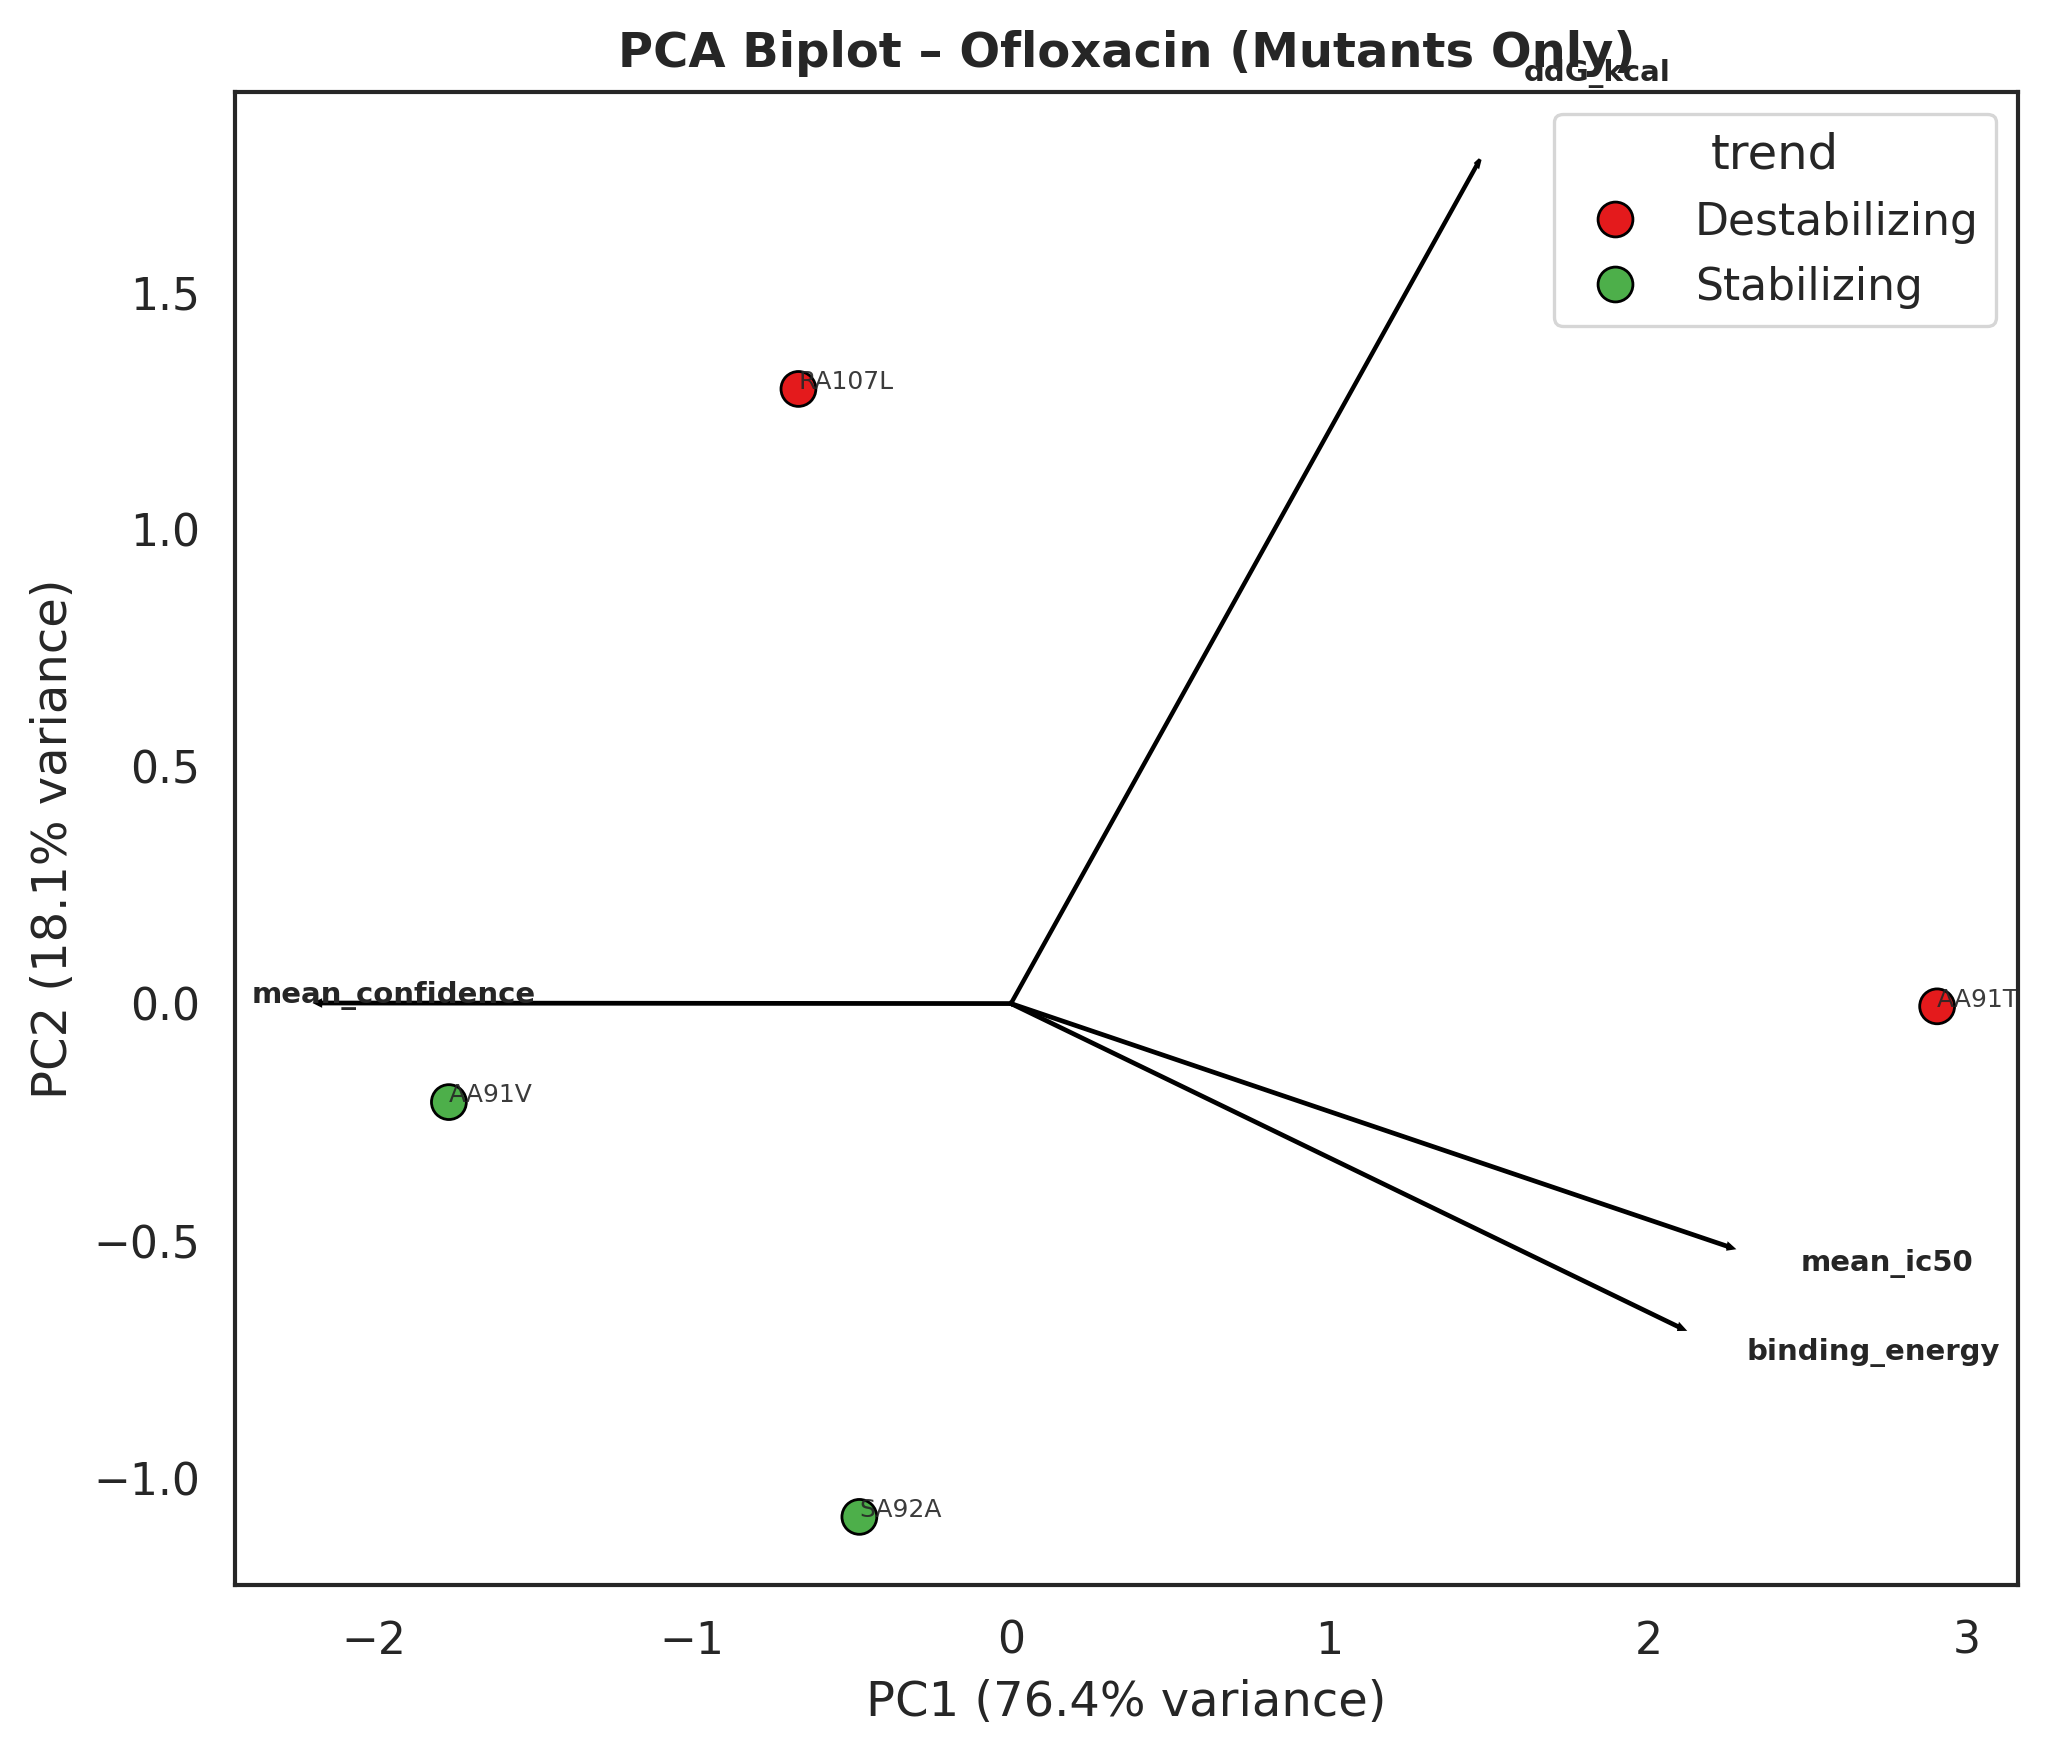

In [35]:
plt.figure(figsize=(7,6), dpi=300)

sns.scatterplot(
    data=df_p,
    x="PC1", y="PC2",
    hue="trend",
    palette=palette,
    s=70, edgecolor="black"
)

for _, row in df_p.iterrows():
    plt.text(row.PC1, row.PC2, row.mutation,
             fontsize=6, alpha=0.9)

for i, var in enumerate(cols_pca):
    plt.arrow(0, 0,
              loadings[i,0]*2,
              loadings[i,1]*2,
              color="black", width=0.003)
    plt.text(loadings[i,0]*2.2, loadings[i,1]*2.2,
             var, fontsize=7, weight="bold")

plt.xlabel(f"PC1 ({v1:.1f}% variance)")
plt.ylabel(f"PC2 ({v2:.1f}% variance)")
plt.title("PCA Biplot – Ofloxacin (Mutants Only)", weight="bold")

plt.tight_layout()
plt.savefig("PCA_biplot_oflox_MUT.png", dpi=600, bbox_inches="tight")
plt.show()


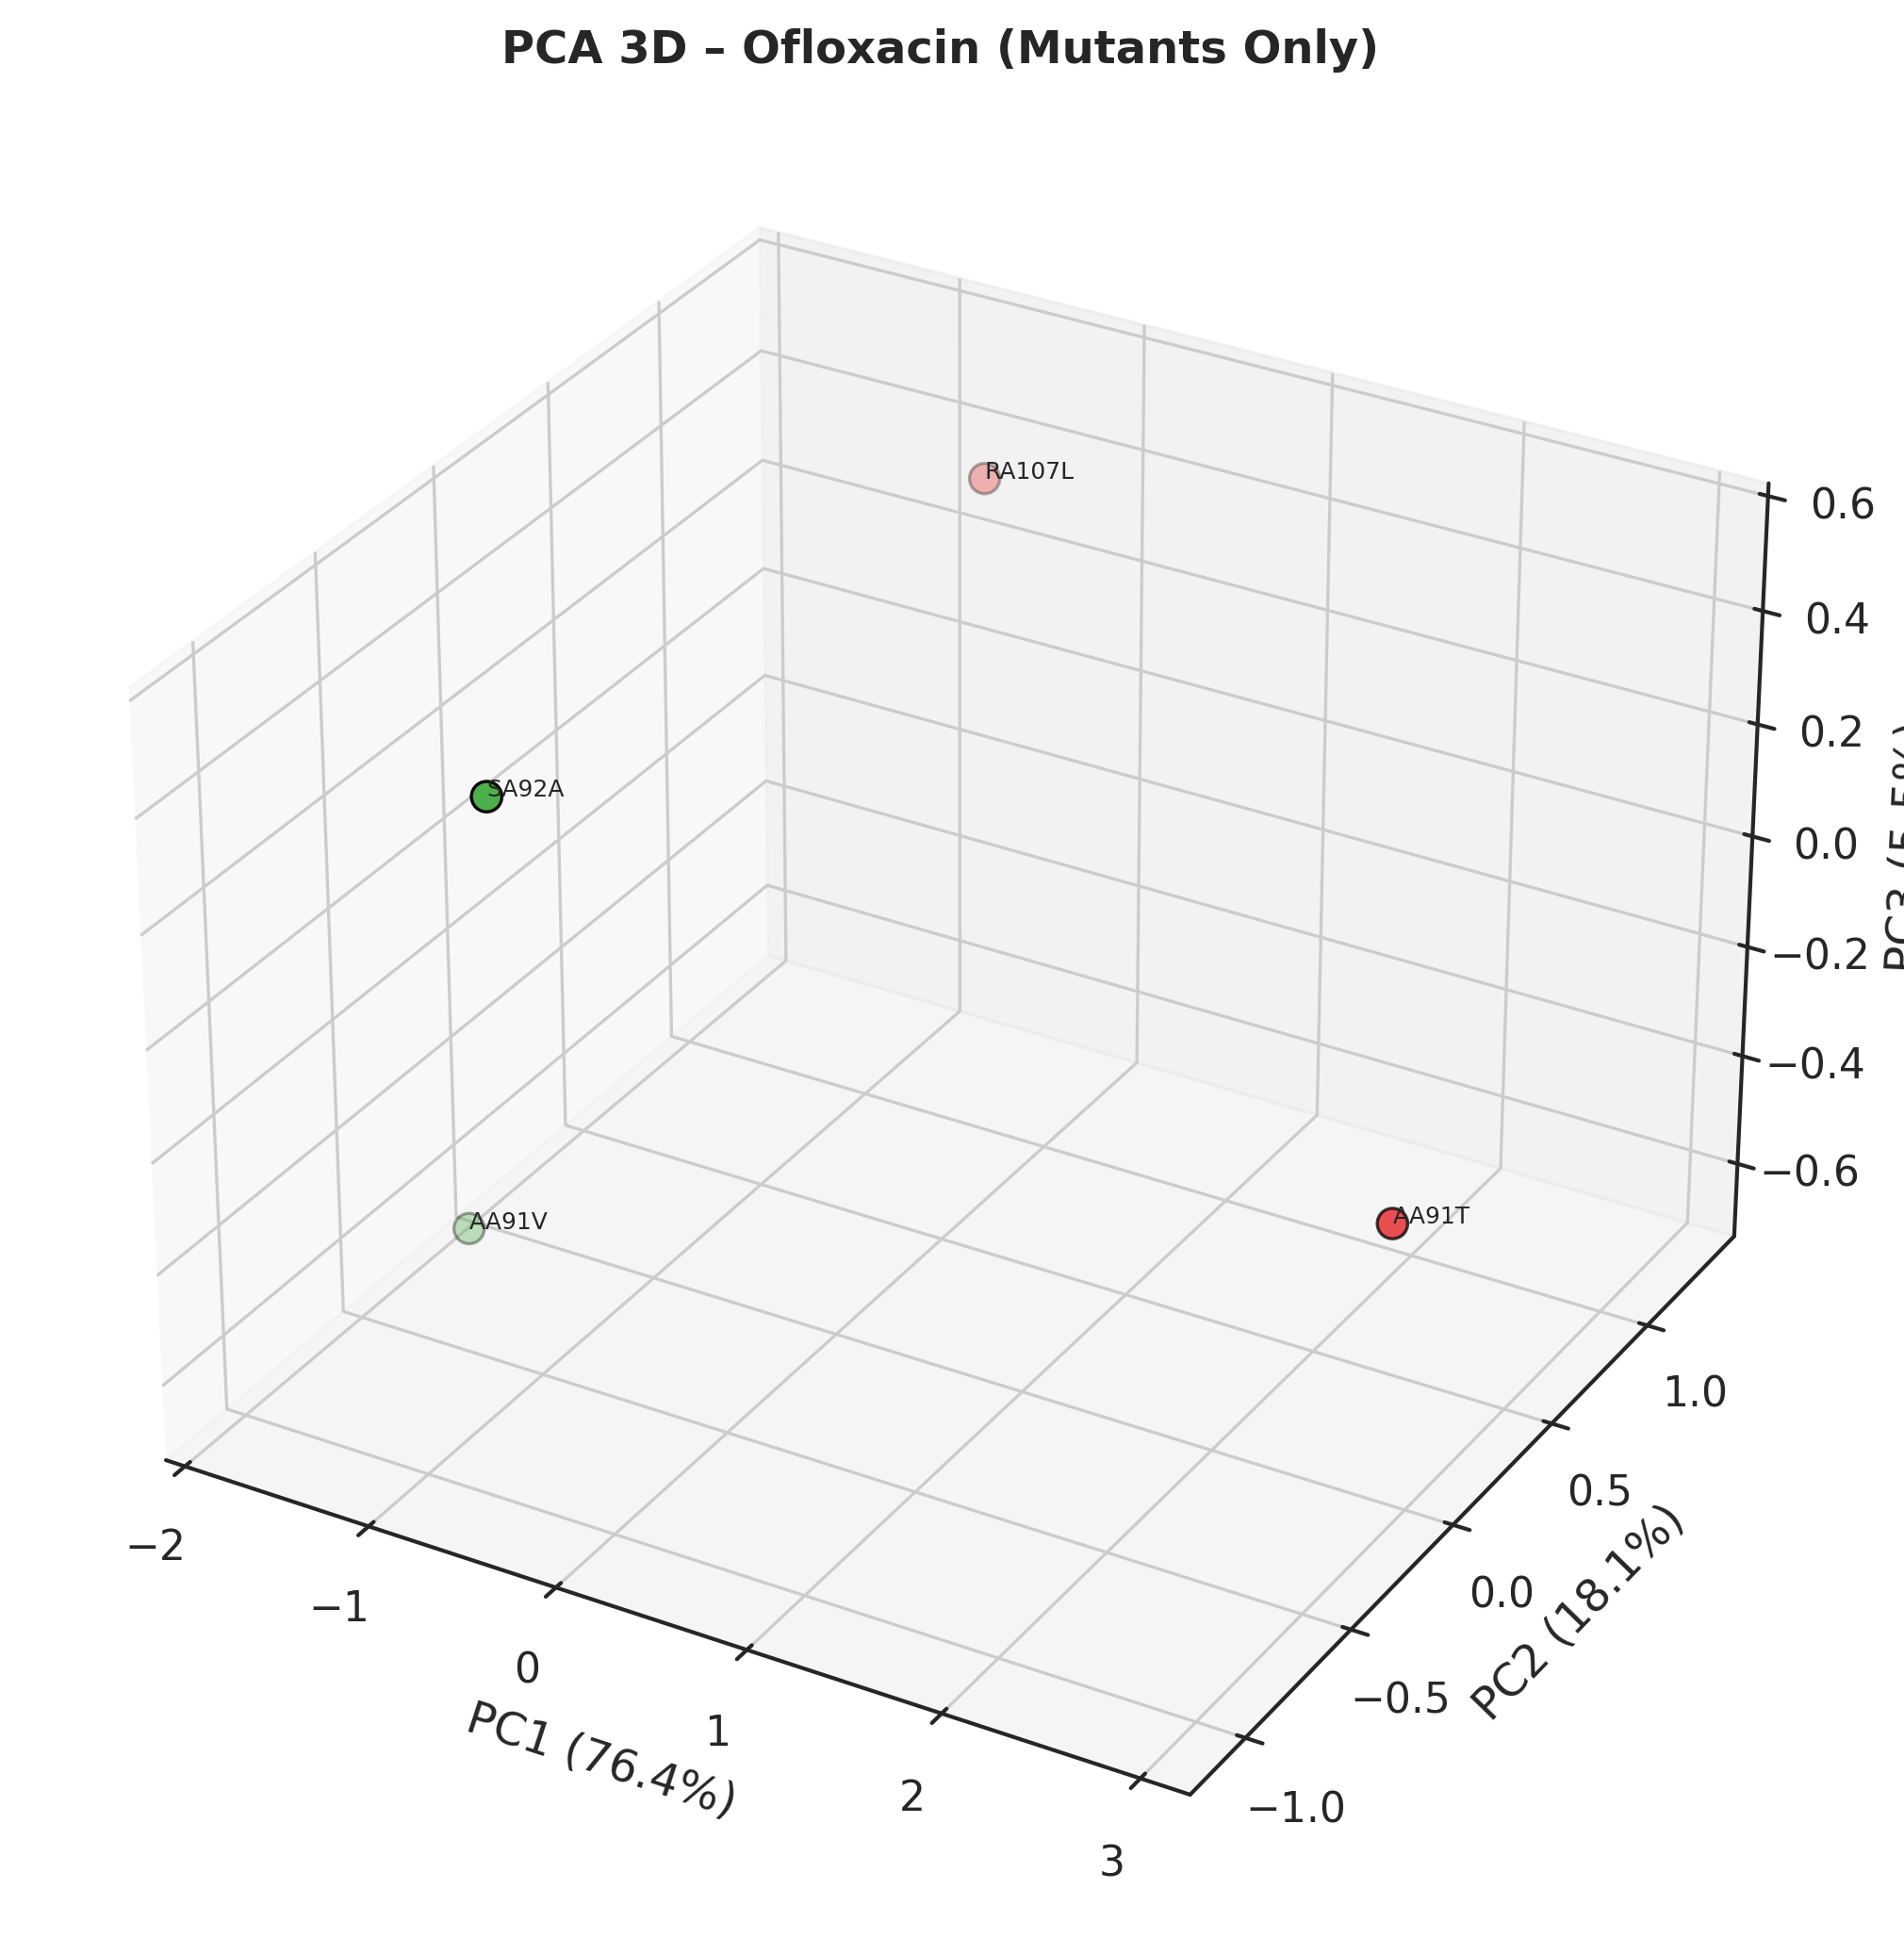

In [36]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,7), dpi=300)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df_p.PC1, df_p.PC2, df_p.PC3,
    c=df_p["trend"].map(palette),
    s=60,
    edgecolor="black"
)

for _, row in df_p.iterrows():
    ax.text(row.PC1, row.PC2, row.PC3,
            row.mutation, fontsize=6)

ax.set_xlabel(f"PC1 ({v1:.1f}%)")
ax.set_ylabel(f"PC2 ({v2:.1f}%)")
ax.set_zlabel(f"PC3 ({v3:.1f}%)")

plt.title("PCA 3D – Ofloxacin (Mutants Only)", weight="bold")
plt.tight_layout()
plt.savefig("PCA3D_oflox_MUT.png", dpi=600, bbox_inches="tight")
plt.show()


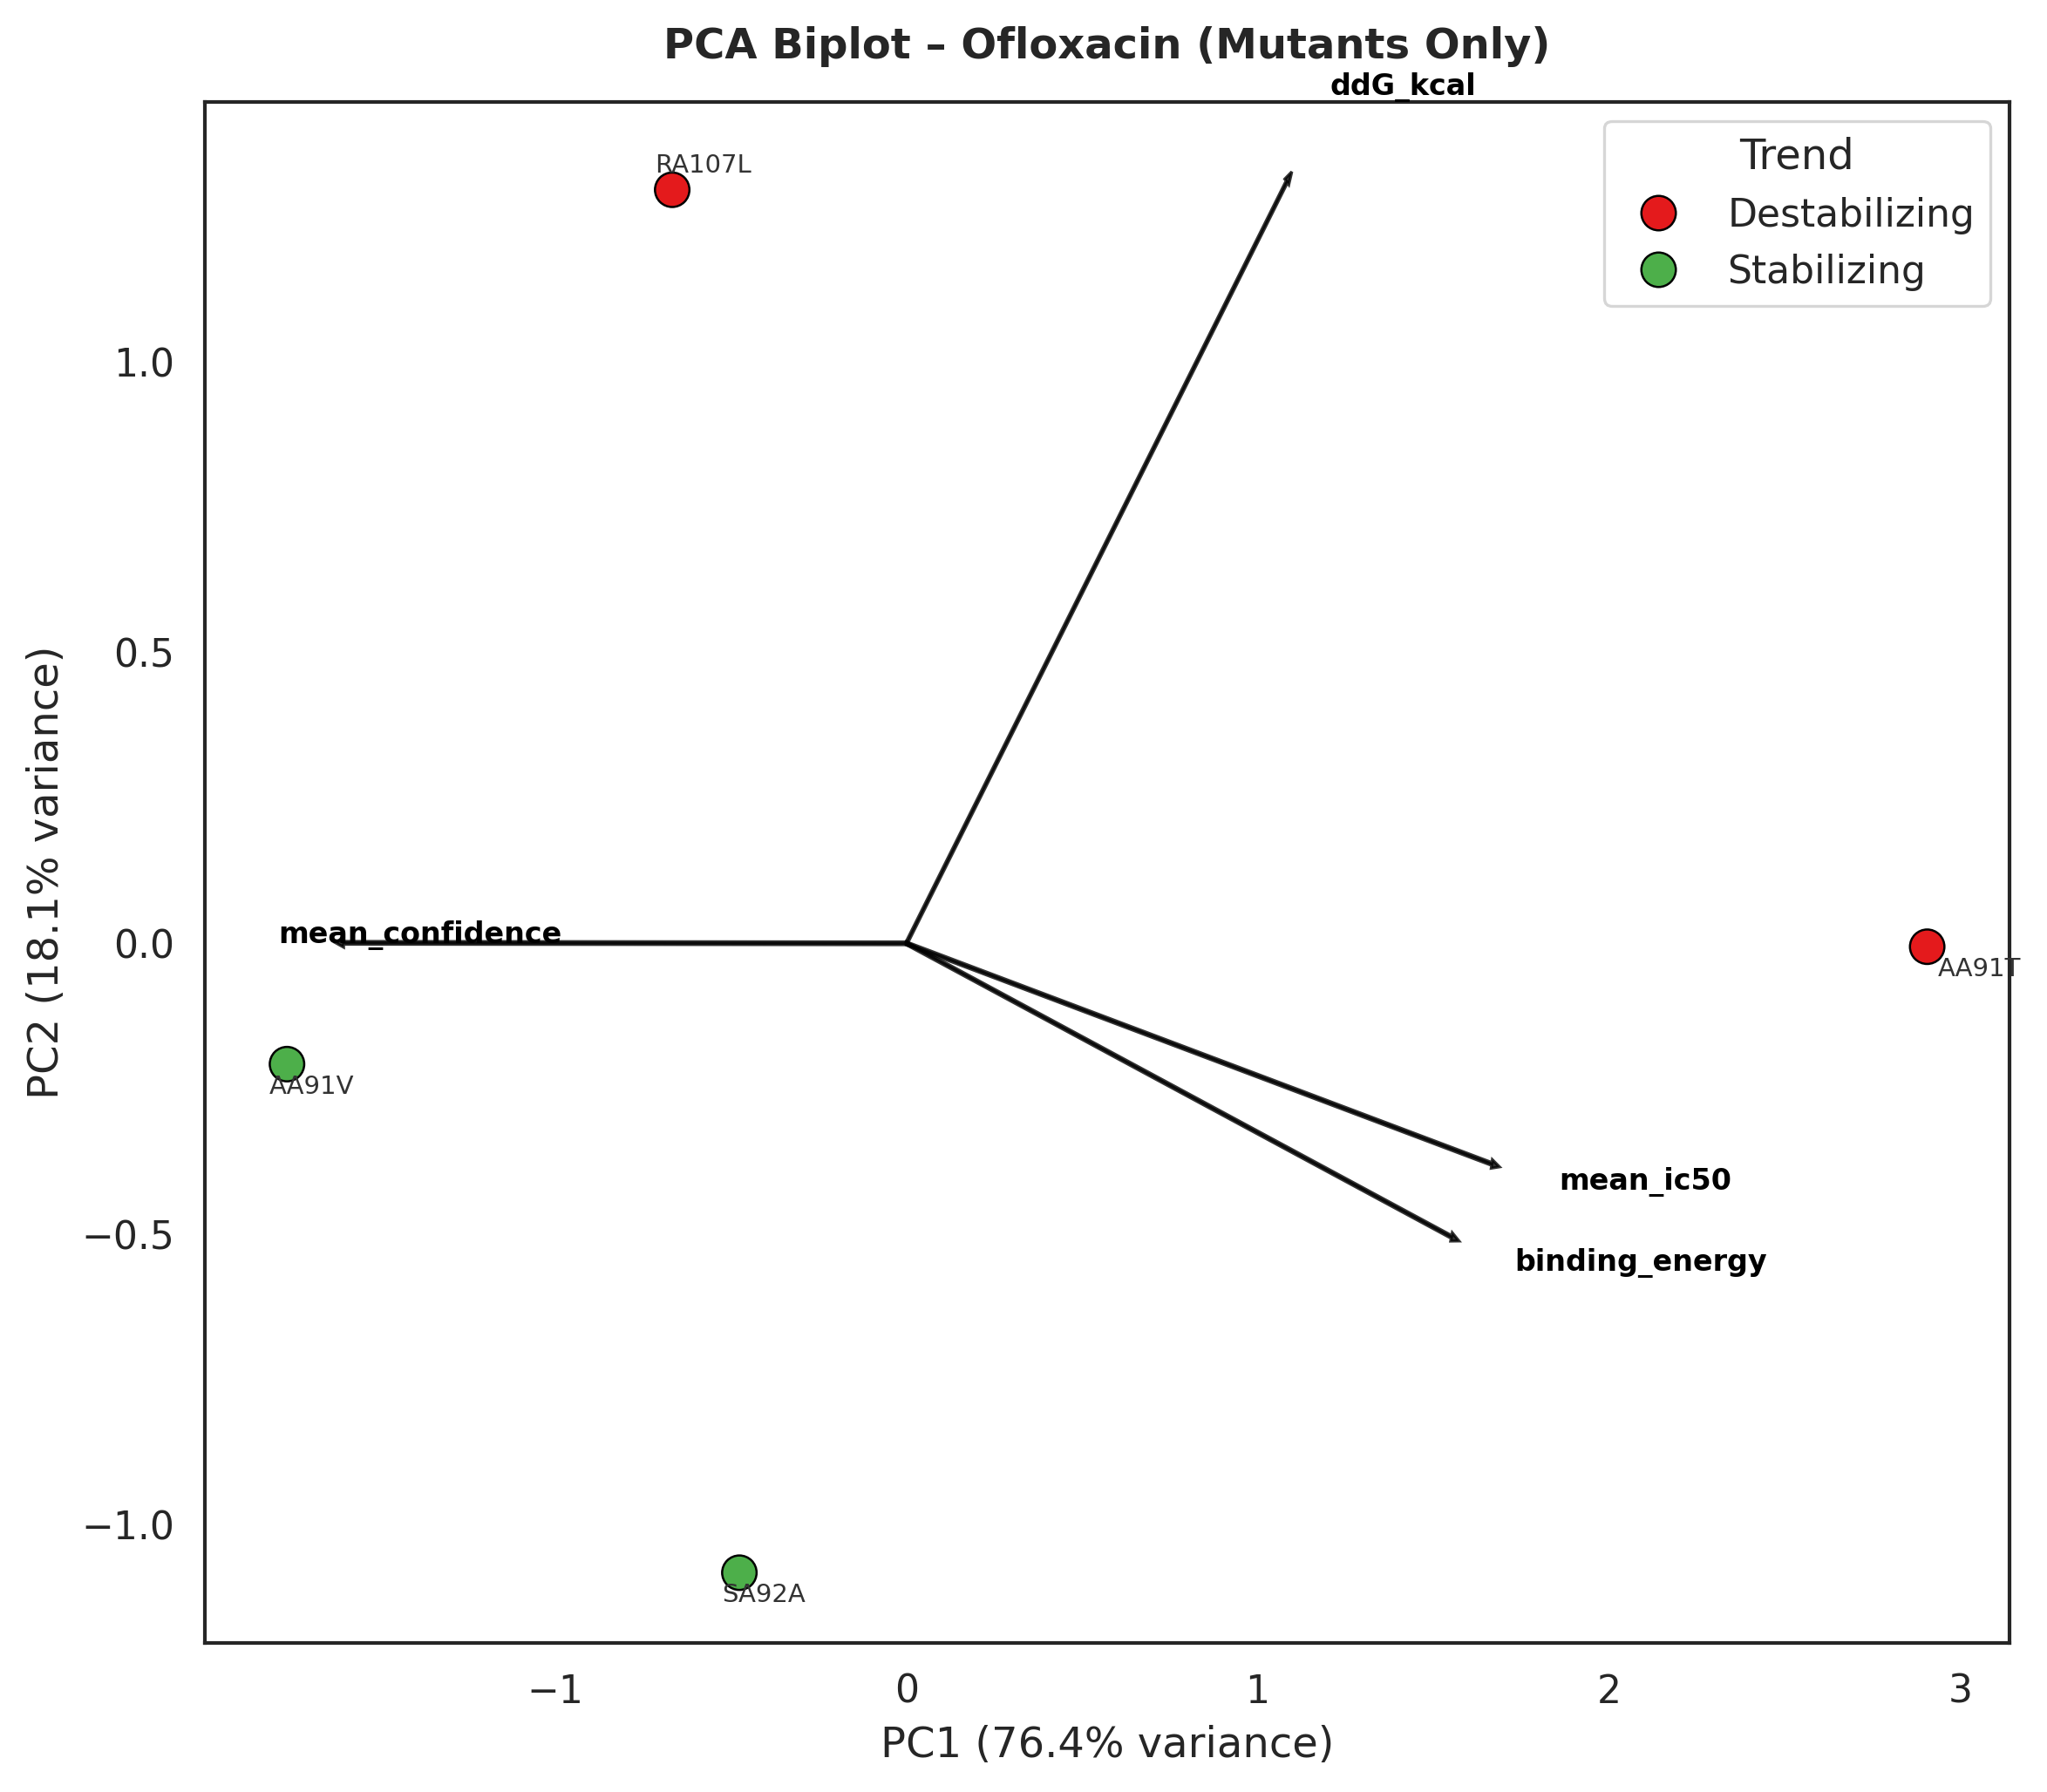

In [38]:
plt.figure(figsize=(8,7), dpi=300)

sns.scatterplot(
    data=df_p,
    x="PC1", y="PC2",
    hue="trend",
    palette=palette,
    s=90,
    edgecolor="black",
    linewidth=0.6
)

# ---- Ajuste automático dos labels (anti-overlap) ----
for _, row in df_p.iterrows():
    dx = 0.03 if row.PC1 >= 0 else -0.05
    dy = 0.03 if row.PC2 >= 0 else -0.05
    plt.text(row.PC1 + dx,
             row.PC2 + dy,
             row.mutation,
             fontsize=7,
             color="#333333",
             weight="medium")

# ---- Loadings (reduzidos e mais elegantes) ----
loading_scale = 1.5  # antes era 2 (mais curto = mais limpo)

for i, var in enumerate(cols_pca):
    plt.arrow(
        0, 0,
        loadings[i,0]*loading_scale,
        loadings[i,1]*loading_scale,
        color="black",
        alpha=0.8,
        width=0.005,
        length_includes_head=True
    )
    plt.text(
        loadings[i,0]*loading_scale*1.1,
        loadings[i,1]*loading_scale*1.1,
        var,
        fontsize=8,
        weight="bold",
        color="black"
    )

plt.xlabel(f"PC1 ({v1:.1f}% variance)")
plt.ylabel(f"PC2 ({v2:.1f}% variance)")
plt.title("PCA Biplot – Ofloxacin (Mutants Only)", weight="bold", pad=12)

plt.legend(title="Trend")
plt.tight_layout()

plt.savefig("PCA_biplot_oflox_MUT_fixed.png", dpi=600, bbox_inches="tight")
plt.show()


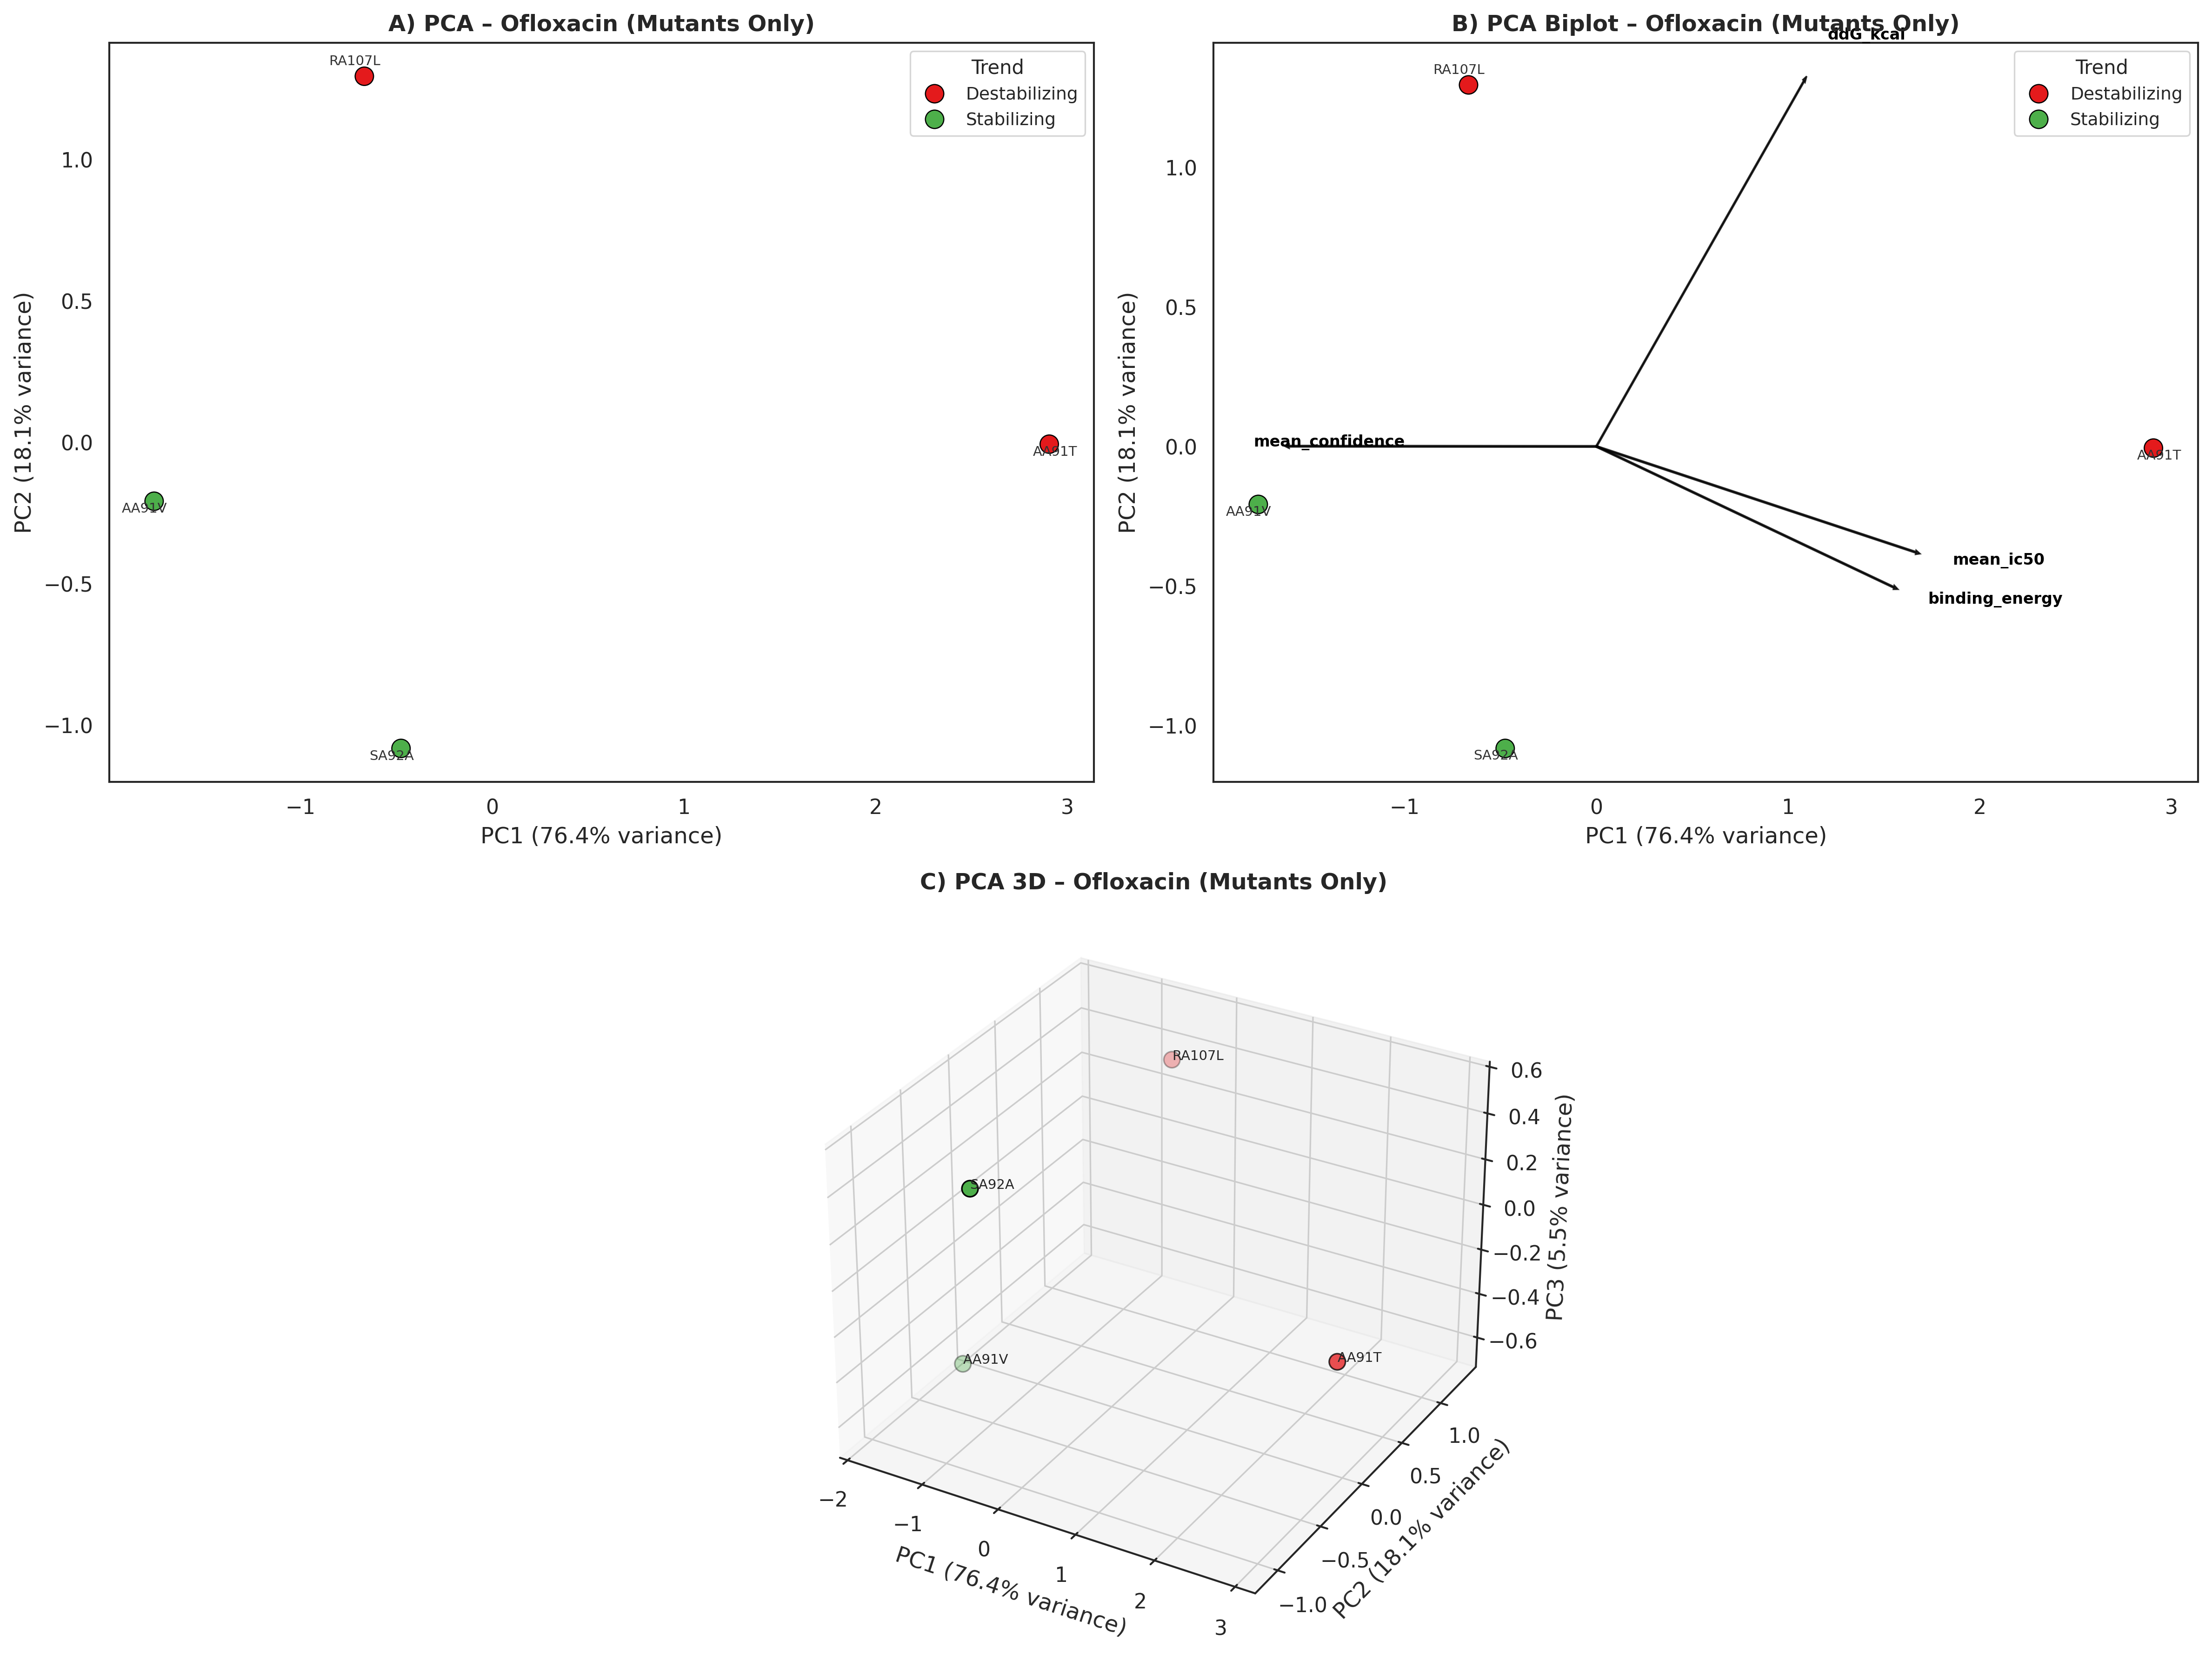

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D

sns.set_theme(style="white", context="paper", font_scale=1.2)

fig = plt.figure(figsize=(16, 12), dpi=300)
gs = GridSpec(2, 2, figure=fig)

# -------------------------
# PANEL A – PCA 2D
# -------------------------
ax1 = fig.add_subplot(gs[0, 0])

sns.scatterplot(
    data=df_p,
    x="PC1", y="PC2",
    hue="trend",
    palette=palette,
    s=90,
    edgecolor="black",
    linewidth=0.6,
    ax=ax1
)

for _, row in df_p.iterrows():
    dx = 0.03 if row.PC1 >= 0 else -0.05
    dy = 0.03 if row.PC2 >= 0 else -0.05
    ax1.text(
        row.PC1 + dx,
        row.PC2 + dy,
        row.mutation,
        fontsize=7,
        ha="center",
        va="bottom",
        color="#333333"
    )

ax1.set_xlabel(f"PC1 ({v1:.1f}% variance)")
ax1.set_ylabel(f"PC2 ({v2:.1f}% variance)")
ax1.set_title("A) PCA – Ofloxacin (Mutants Only)", weight="bold")
ax1.legend(title="Trend", fontsize=9, title_fontsize=10)

# -------------------------
# PANEL B – Biplot
# -------------------------
ax2 = fig.add_subplot(gs[0, 1])

sns.scatterplot(
    data=df_p,
    x="PC1", y="PC2",
    hue="trend",
    palette=palette,
    s=90,
    edgecolor="black",
    linewidth=0.6,
    ax=ax2
)

for _, row in df_p.iterrows():
    dx = 0.03 if row.PC1 >= 0 else -0.05
    dy = 0.03 if row.PC2 >= 0 else -0.05
    ax2.text(
        row.PC1 + dx,
        row.PC2 + dy,
        row.mutation,
        fontsize=7,
        ha="center",
        va="bottom",
        color="#333333"
    )

loading_scale = 1.5  # encurta os vetores para ficar mais limpo

for i, var in enumerate(cols_pca):
    ax2.arrow(
        0, 0,
        loadings[i, 0] * loading_scale,
        loadings[i, 1] * loading_scale,
        color="black",
        alpha=0.8,
        width=0.005,
        length_includes_head=True
    )
    ax2.text(
        loadings[i, 0] * loading_scale * 1.1,
        loadings[i, 1] * loading_scale * 1.1,
        var,
        fontsize=8,
        weight="bold",
        color="black"
    )

ax2.set_xlabel(f"PC1 ({v1:.1f}% variance)")
ax2.set_ylabel(f"PC2 ({v2:.1f}% variance)")
ax2.set_title("B) PCA Biplot – Ofloxacin (Mutants Only)", weight="bold")
ax2.legend(title="Trend", fontsize=9, title_fontsize=10)

# -------------------------
# PANEL C – PCA 3D (embaixo)
# -------------------------
ax3 = fig.add_subplot(gs[1, :], projection="3d")

colors = df_p["trend"].map(palette)

ax3.scatter(
    df_p["PC1"],
    df_p["PC2"],
    df_p["PC3"],
    c=colors,
    s=70,
    edgecolor="black"
)

for _, row in df_p.iterrows():
    ax3.text(
        row.PC1,
        row.PC2,
        row.PC3,
        row.mutation,
        fontsize=7
    )

ax3.set_xlabel(f"PC1 ({v1:.1f}% variance)")
ax3.set_ylabel(f"PC2 ({v2:.1f}% variance)")
ax3.set_zlabel(f"PC3 ({v3:.1f}% variance)")
ax3.set_title("C) PCA 3D – Ofloxacin (Mutants Only)", weight="bold")

plt.tight_layout()

plt.savefig(
    "Multipanel_PCA_oflox_MUT_fixed.png",
    dpi=600,
    bbox_inches="tight",
    pad_inches=0.1,
    facecolor="white"
)

plt.show()


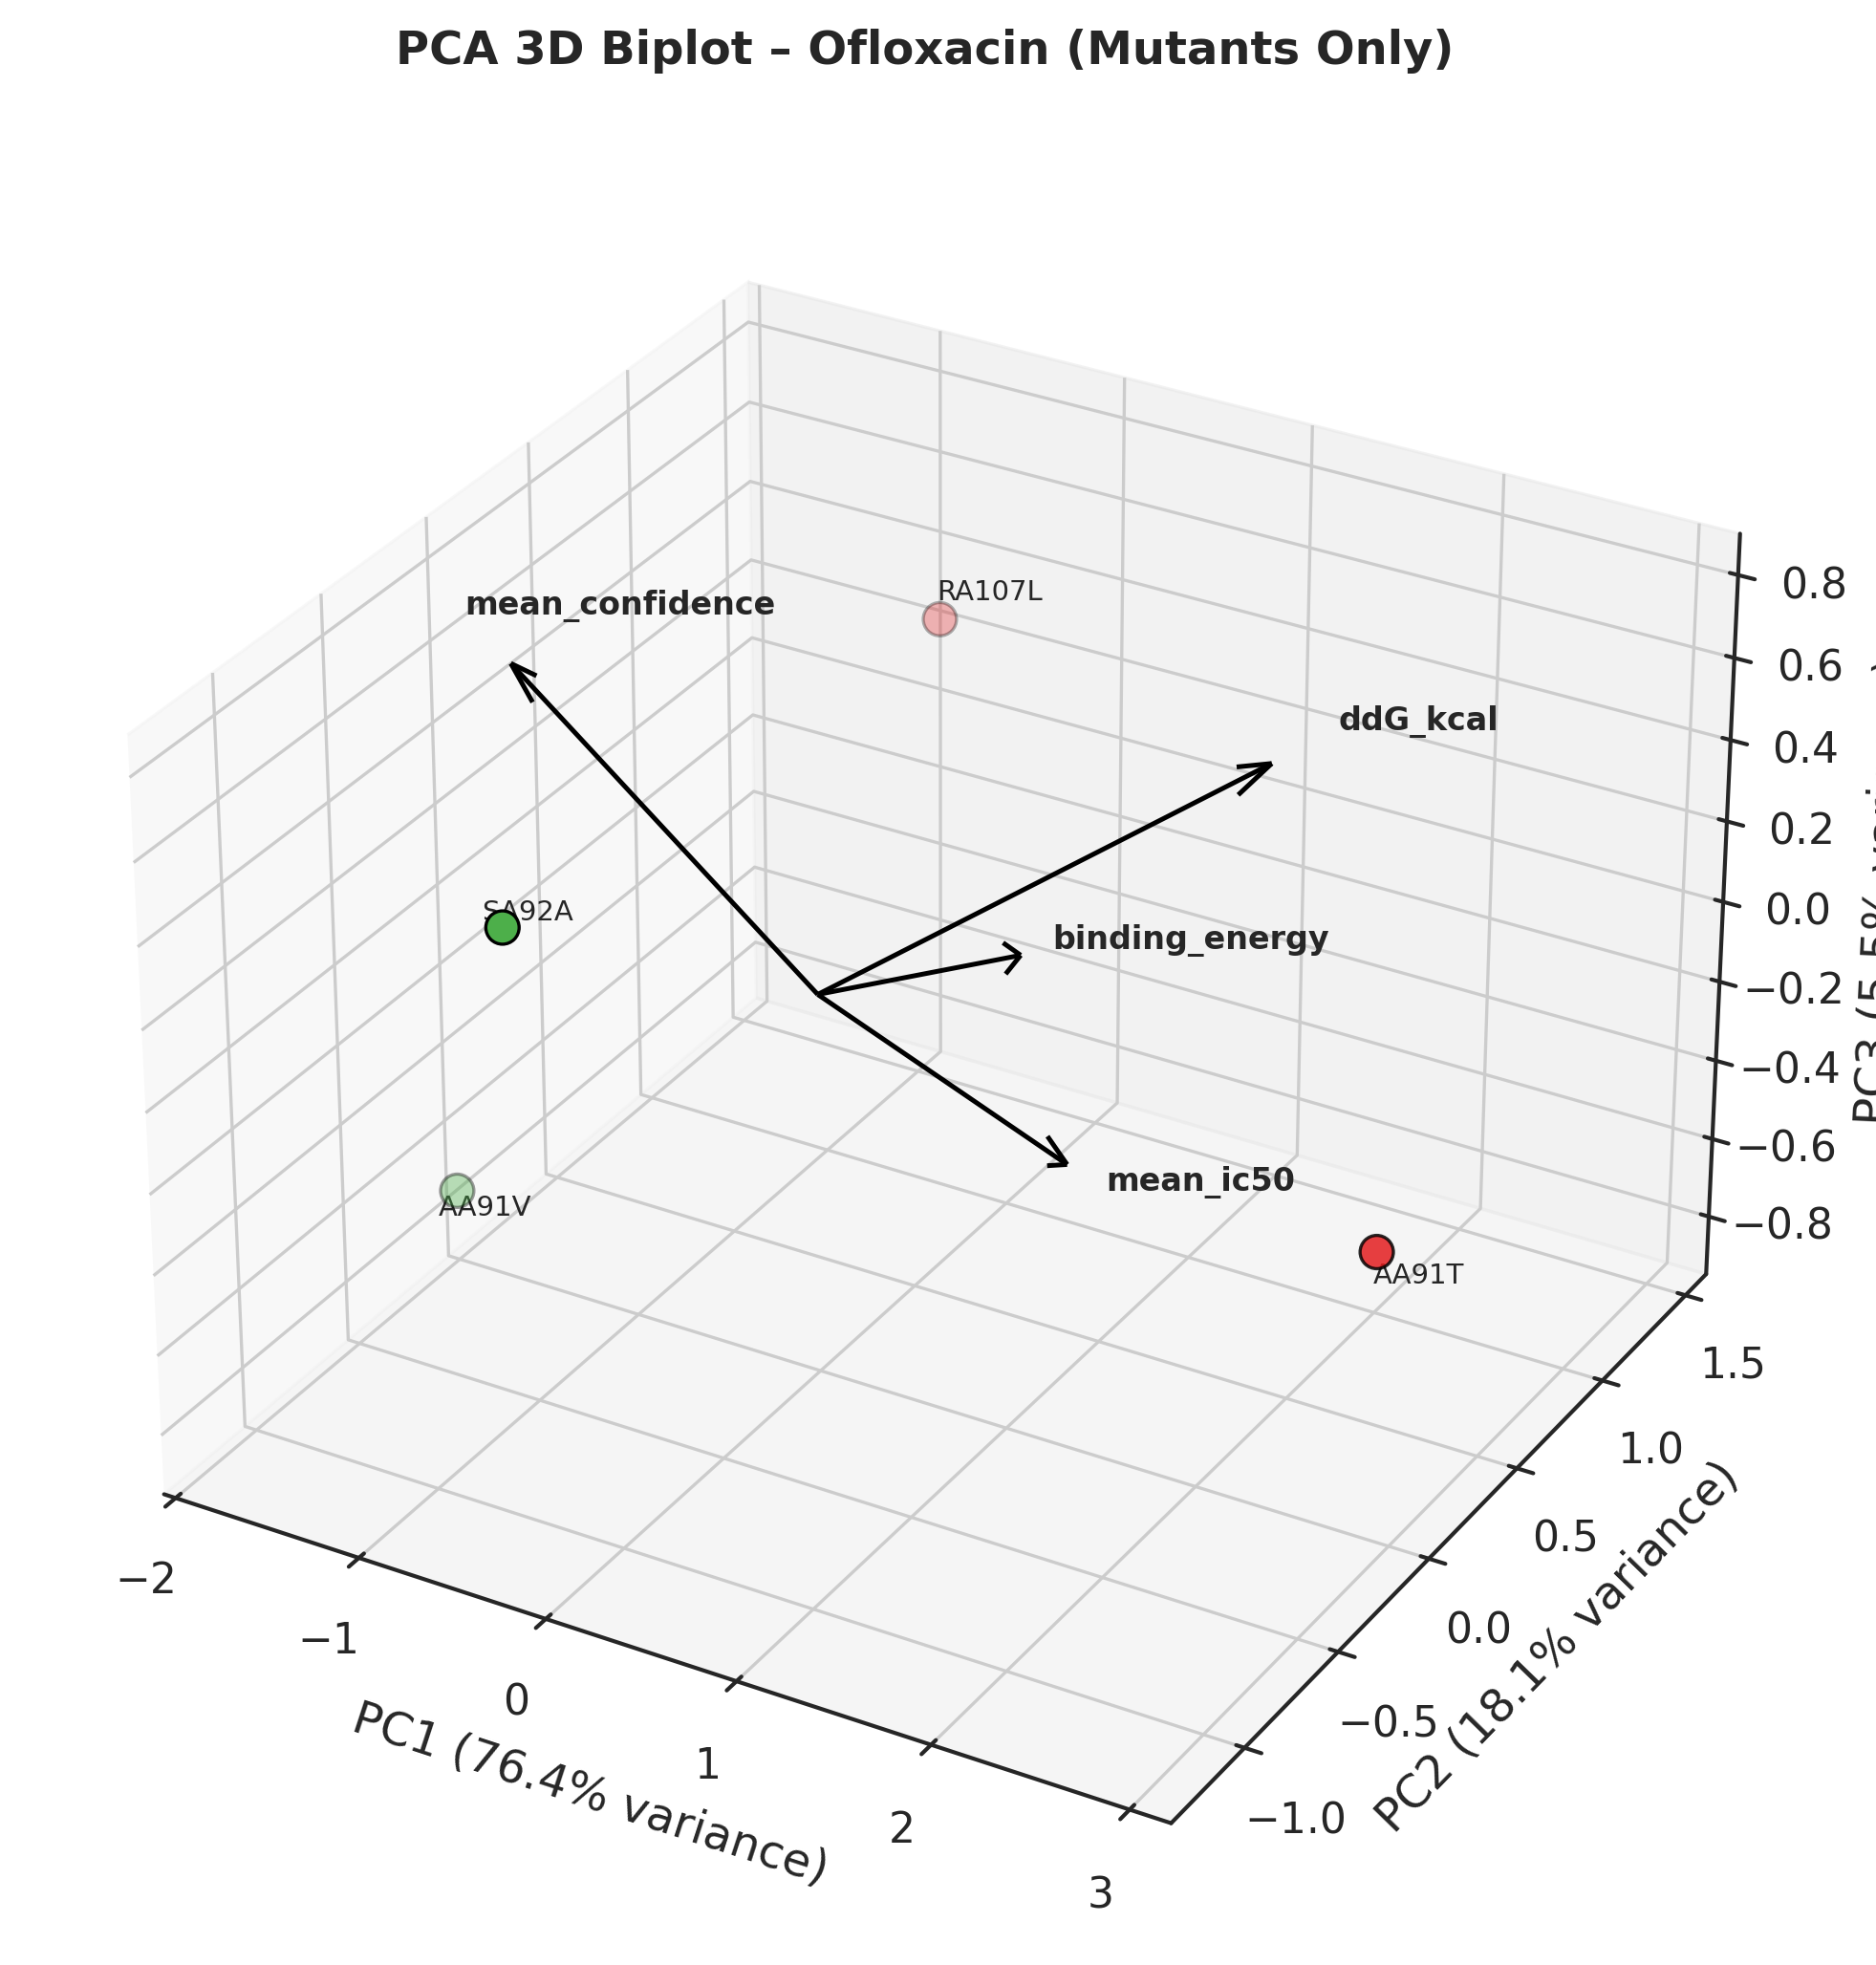

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white", context="paper", font_scale=1.2)

fig = plt.figure(figsize=(9, 7), dpi=300)
ax = fig.add_subplot(111, projection='3d')

# ---------------------------
# 1) Pontos (mutações)
# ---------------------------
scores = df_p[["PC1", "PC2", "PC3"]].values
colors = df_p["trend"].map(palette)

ax.scatter(
    scores[:, 0],
    scores[:, 1],
    scores[:, 2],
    c=colors,
    s=70,
    edgecolor="black"
)

# labels das mutações com pequeno offset
for _, row in df_p.iterrows():
    dx = 0.03 if row.PC1 >= 0 else -0.05
    dy = 0.03 if row.PC2 >= 0 else -0.05
    dz = 0.03 if row.PC3 >= 0 else -0.05
    ax.text(
        row.PC1 + dx,
        row.PC2 + dy,
        row.PC3 + dz,
        row.mutation,
        fontsize=7
    )

# ---------------------------
# 2) Vetores das variáveis (loadings 3D)
# ---------------------------
# loadings já tem 3 colunas (PC1, PC2, PC3)
loading_scale = 1.5

for i, var in enumerate(cols_pca):
    x, y, z = loadings[i, 0], loadings[i, 1], loadings[i, 2]

    ax.quiver(
        0, 0, 0,
        x * loading_scale,
        y * loading_scale,
        z * loading_scale,
        color="black",
        arrow_length_ratio=0.08,
        linewidth=1.2
    )

    ax.text(
        x * loading_scale * 1.15,
        y * loading_scale * 1.15,
        z * loading_scale * 1.15,
        var,
        fontsize=8,
        weight="bold"
    )

# ---------------------------
# 3) Ajustar limites para caber tudo
# ---------------------------
# incluir scores + loadings no cálculo dos limites
all_x = np.concatenate([scores[:, 0], loadings[:, 0] * loading_scale])
all_y = np.concatenate([scores[:, 1], loadings[:, 1] * loading_scale])
all_z = np.concatenate([scores[:, 2], loadings[:, 2] * loading_scale])

margin = 0.3
ax.set_xlim(all_x.min() - margin, all_x.max() + margin)
ax.set_ylim(all_y.min() - margin, all_y.max() + margin)
ax.set_zlim(all_z.min() - margin, all_z.max() + margin)

# ---------------------------
# 4) Rótulos, título e salvar
# ---------------------------
ax.set_xlabel(f"PC1 ({v1:.1f}% variance)")
ax.set_ylabel(f"PC2 ({v2:.1f}% variance)")
ax.set_zlabel(f"PC3 ({v3:.1f}% variance)")

ax.set_title("PCA 3D Biplot – Ofloxacin (Mutants Only)", weight="bold", pad=20)

plt.tight_layout()
plt.savefig(
    "PCA3D_oflox_MUT_biplot.png",
    dpi=600,
    bbox_inches="tight",
    pad_inches=0.05,
    facecolor="white"
)
plt.show()


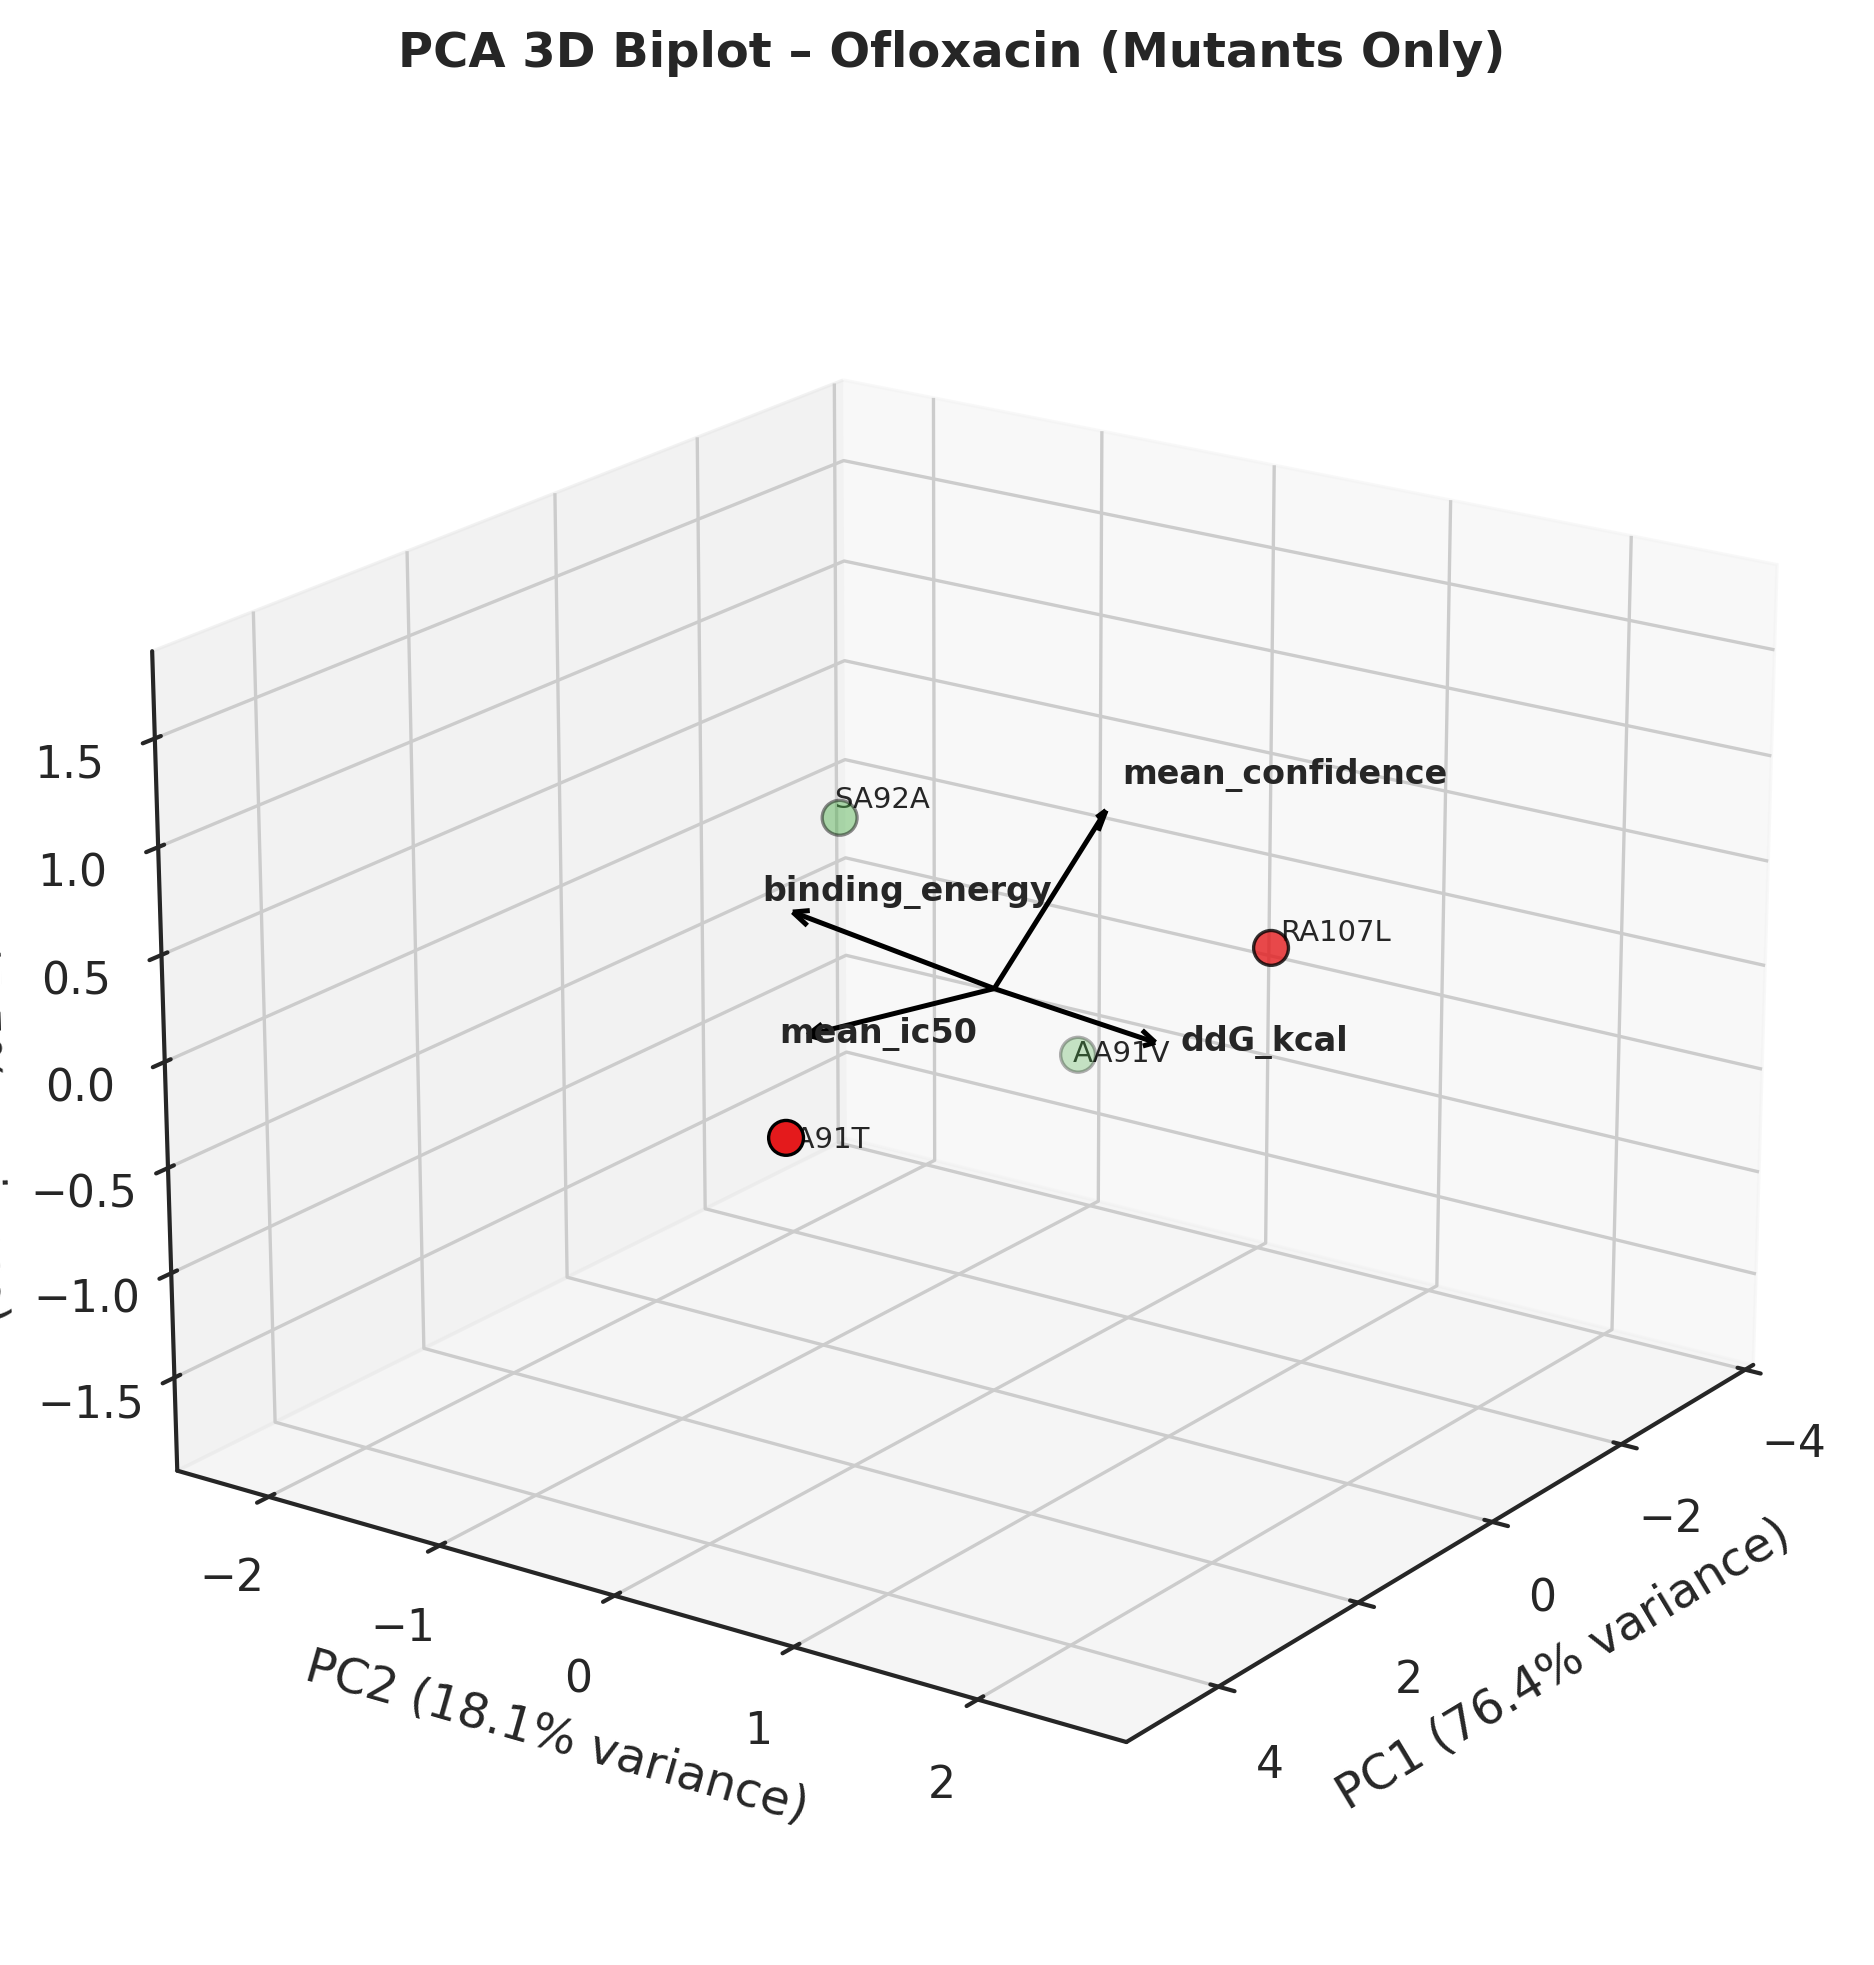

In [41]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white", context="paper", font_scale=1.2)

fig = plt.figure(figsize=(9, 7), dpi=300)
ax = fig.add_subplot(111, projection='3d')

# ------- pontos (mutações) -------
scores = df_p[["PC1", "PC2", "PC3"]].values
colors = df_p["trend"].map(palette)

ax.scatter(
    scores[:, 0],
    scores[:, 1],
    scores[:, 2],
    c=colors,
    s=70,
    edgecolor="black"
)

for _, row in df_p.iterrows():
    dx = 0.03 if row.PC1 >= 0 else -0.05
    dy = 0.03 if row.PC2 >= 0 else -0.05
    dz = 0.03 if row.PC3 >= 0 else -0.05
    ax.text(
        row.PC1 + dx,
        row.PC2 + dy,
        row.PC3 + dz,
        row.mutation,
        fontsize=7
    )

# ------- vetores (loadings 3D) -------
loading_scale = 1.5

for i, var in enumerate(cols_pca):
    x, y, z = loadings[i, 0], loadings[i, 1], loadings[i, 2]

    ax.quiver(
        0, 0, 0,
        x * loading_scale,
        y * loading_scale,
        z * loading_scale,
        color="black",
        arrow_length_ratio=0.08,
        linewidth=1.2
    )

    ax.text(
        x * loading_scale * 1.15,
        y * loading_scale * 1.15,
        z * loading_scale * 1.15,
        var,
        fontsize=8,
        weight="bold"
    )

# ------- ajustar limites pra nada cortar -------
all_x = np.concatenate([scores[:, 0], loadings[:, 0] * loading_scale])
all_y = np.concatenate([scores[:, 1], loadings[:, 1] * loading_scale])
all_z = np.concatenate([scores[:, 2], loadings[:, 2] * loading_scale])

def set_with_margin(vals, extra=0.5):
    vmin, vmax = vals.min(), vals.max()
    span = vmax - vmin
    margin = span * 0.4 + extra
    return vmin - margin, vmax + margin

ax.set_xlim(*set_with_margin(all_x))
ax.set_ylim(*set_with_margin(all_y))
ax.set_zlim(*set_with_margin(all_z, extra=0.8))  # mais folga no PC3

# vista mais aberta
ax.view_init(elev=20, azim=35)

# ------- rótulos e título -------
ax.set_xlabel(f"PC1 ({v1:.1f}% variance)")
ax.set_ylabel(f"PC2 ({v2:.1f}% variance)")
ax.set_zlabel(f"PC3 ({v3:.1f}% variance)")

ax.set_title("PCA 3D Biplot – Ofloxacin (Mutants Only)", weight="bold", pad=20)

# em vez de tight_layout, ajusta manualmente
fig.subplots_adjust(left=0.02, right=0.98, top=0.90, bottom=0.05)

plt.savefig(
    "PCA3D_oflox_MUT_biplot_fixed.png",
    dpi=600,
    bbox_inches="tight",
    pad_inches=0.10,
    facecolor="white"
)
plt.show()


In [43]:
from google.colab import files

files_to_download = [
    "scatter_corr_oflox.png",
    "heatmap_oflox.png",
    "PCA2D_oflox_MUT.png",
    "PCA_biplot_oflox_MUT.png",
    "PCA3D_oflox_MUT.png",
    "PCA_Panel_Ofloxacin_MUT.png"
]

for fname in files_to_download:
    try:
        files.download(fname)
    except Exception as e:
        print(f"Arquivo não encontrado: {fname} -> {e}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Arquivo não encontrado: PCA_Panel_Ofloxacin_MUT.png -> Cannot find file: PCA_Panel_Ofloxacin_MUT.png
